## Jax IlluminaWGS

### July 7, 2020

#### global varibles and libraries

#global notebook variables for both python and bash majic (by stdin arguments)
WRKDIR = '/Users/mooreank/Desktop/Mark/UNHS'
PRJ_BUCKET = 'gs://nihnialngcbg-testing'
PROJECT_ID = 'nih-nia-lng-cbg'
MYUSER = 'mooreank'
AUTOSOMES=[str(x) for x in list(range(1,23))]
SEXOMES=['X','Y']
CHROMOSOMES=AUTOSOMES + SEXOMES
COHORT='UNHS'
COHORT_BUCKET=f'{PRJ_BUCKET}/{COHORT}'

In [163]:
#global notebook variables for both python and bash majic (by stdin arguments)
#WRKDIR = '/Users/mooreank/Desktop/Mark/UNHS'
WRKDIR = '/Users/pengl7/Downloads/Jax'
#PRJ_BUCKET = 'gs://nihnialngcbg-testing'
PRJ_BUCKET = 'gs://singlecellindi'
#PROJECT_ID = 'nih-nia-lng-cbg'
PROJECT_ID = 'singlecellseq'
#MYUSER = 'mooreank'
MYUSER = 'pengl7'
AUTOSOMES=[str(x) for x in list(range(1,23))]
SEXOMES=['X','Y']
CHROMOSOMES=AUTOSOMES + SEXOMES

# COHORT='UNHS'
# remember the folder sequence should also be the same in the local dir
COHORT = 'Jax'

# Notice that COHORT_BUCKET means the main data_folder path in the project bucket, instead of a bucket name
COHORT_BUCKET=f'{PRJ_BUCKET}/{COHORT}'

In [158]:
!echo ${PRJ_BUCKET}/${COHORT}

://singlecellindi/


In [ ]:
### when use %%bash for variable defined outside it, remember to add arguments, don't forget -s, don't forget $

In [164]:
%%bash -s "$PRJ_BUCKET" "$COHORT"
PRJ_BUCKET=${1}
COHORT=${2}
echo ${PRJ_BUCKET}/${COHORT}

gs://singlecellindi/Jax


In [165]:
COHORT_BUCKET 

'gs://singlecellindi/Jax'

In [166]:
#import libraries
import pandas as pd
import numpy as np
import time
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

#### Check the number of files inside the data folder

number of fastqs is different: 19 instead of 18 (need to substract one because the parental folder  path was caluclated as a 

In [167]:
%%bash -s "$COHORT_BUCKET"

COHORT_BUCKET=${1}

gsutil ls ${COHORT_BUCKET}/IlluminaWGS/*fastq* | wc -l
echo ${COHORT_BUCKET}/IlluminaWGS/*fastq*  
gsutil ls ${COHORT_BUCKET}/IlluminaWGS/*fastq*


      18
gs://singlecellindi/Jax/IlluminaWGS/*fastq*
gs://singlecellindi/Jax/IlluminaWGS/KOLF2-ARID2-A2_GT20-02408_AAGTCCAA-TATGAGTA_S303_L003_R1_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/KOLF2-ARID2-A2_GT20-02408_AAGTCCAA-TATGAGTA_S303_L003_R2_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/KUCG3-C1_GT20-02406_TTATAACC-GATATCGA_S306_L003_R1_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/KUCG3-C1_GT20-02406_TTATAACC-GATATCGA_S306_L003_R2_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/LNGPI1-C1_GT20-02411_CAAGCTAG-ACATAGCG_S302_L003_R1_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/LNGPI1-C1_GT20-02411_CAAGCTAG-ACATAGCG_S302_L003_R2_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/NCRM1-C6_GT20-02407_GGACTTGG-CGCAGACG_S309_L003_R1_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/NCRM1-C6_GT20-02407_GGACTTGG-CGCAGACG_S309_L003_R2_001.fastq.gz
gs://singlecellindi/Jax/IlluminaWGS/NCRM5-C5_GT20-02409_ATCCACTG-AGGTGCGT_S304_L003_R1_001.fastq.gz
gs://singlecellindi/Jax/IlluminaW

### Get the file name for each fastq file

-s option: This  option  allows the positional parameters to be set when invoking an interactive shell.

In [168]:
%%bash -s "$WRKDIR" "$COHORT" "$COHORT_BUCKET"
#get fastq listing and tokenize
WRKDIR=${1}
COHORT=${2}
COHORT_BUCKET=${3}

#generate a txt file to store the name of each file, also do string manipulation for each file
#generate the txt file name variable: FASTQ_LISTING

FASTQ_LISTING=${WRKDIR}/${COHORT}.fastq.listing.txt

#Export every path of the file to the txt file
#gsutil ls gs://nihnialngcbg-testing/UNHS/fastqs/*.fastq.gz > ${FASTQ_LISTING}
gsutil ls ${COHORT_BUCKET}/IlluminaWGS/*.fastq.gz > ${FASTQ_LISTING}

# do string substitute for each file name to get rid of prefix "gs://nihnialngcbg-testing/UNHS/2001UNHS-0041/fastqs/"
# sed example:  's/day/night/g'

sed -i -e s"/gs:\/\/singlecellindi\/Jax\/IlluminaWGS\///"g ${FASTQ_LISTING}

# get rid of subfix ".fastq.gz"
sed -i -e s"/\.fastq\.gz//"g ${FASTQ_LISTING}

# replace the "_" with a space
sed -i -e s'/_/\ /'g ${FASTQ_LISTING}

# the first part of each line is the sample info
less ${FASTQ_LISTING} | wc -l
head ${FASTQ_LISTING}
tail ${FASTQ_LISTING}

      18
KOLF2-ARID2-A2 GT20-02408 AAGTCCAA-TATGAGTA S303 L003 R1 001
KOLF2-ARID2-A2 GT20-02408 AAGTCCAA-TATGAGTA S303 L003 R2 001
KUCG3-C1 GT20-02406 TTATAACC-GATATCGA S306 L003 R1 001
KUCG3-C1 GT20-02406 TTATAACC-GATATCGA S306 L003 R2 001
LNGPI1-C1 GT20-02411 CAAGCTAG-ACATAGCG S302 L003 R1 001
LNGPI1-C1 GT20-02411 CAAGCTAG-ACATAGCG S302 L003 R2 001
NCRM1-C6 GT20-02407 GGACTTGG-CGCAGACG S309 L003 R1 001
NCRM1-C6 GT20-02407 GGACTTGG-CGCAGACG S309 L003 R2 001
NCRM5-C5 GT20-02409 ATCCACTG-AGGTGCGT S304 L003 R1 001
NCRM5-C5 GT20-02409 ATCCACTG-AGGTGCGT S304 L003 R2 001
NCRM5-C5 GT20-02409 ATCCACTG-AGGTGCGT S304 L003 R1 001
NCRM5-C5 GT20-02409 ATCCACTG-AGGTGCGT S304 L003 R2 001
NN0003932-C3 GT20-02410 GCTTGTCA-GAACATAC S307 L003 R1 001
NN0003932-C3 GT20-02410 GCTTGTCA-GAACATAC S307 L003 R2 001
NN0004297-C1 GT20-02405 CCGCGGTT-AGCGCTAG S308 L003 R1 001
NN0004297-C1 GT20-02405 CCGCGGTT-AGCGCTAG S308 L003 R2 001
PGP1-C2 GT20-02412 TGGATCGA-GTGCGATA S305 L003 R1 001
PGP1-C2 GT20-02412 TGGATCGA

#### load fastq listing and USUHS sample info and ID mappings

Download the metadata from buckt to the folder of meta in the working directory

In [119]:
#ok now see what we have
#load the USUHS quality reports
usuhs_qa_file = f'{WRKDIR}/meta/Jax_IlluminaWGS_20-cel-001_QCreport.csv'
usuhs_qa = pd.read_csv(usuhs_qa_file, header=15)
print(usuhs_qa.shape)

#load the fastq info
fastqs_file = f'{WRKDIR}/{COHORT}.fastq.listing.txt'
fastqs_df = pd.read_csv(fastqs_file,header=None, sep=" ", dtype='category')
fastqs_df.columns = ['Sample_Name','usuhsID', 'Adaptor', 'S', 'LANE', 'READ', 'NUM']
print(fastqs_df.shape)

#load usuhs key map
# usuhs_key_file = WRKDIR + '/pA3.hernandez.export1.keyTable.june.27.2019.csv'
# usuhs_keys_df = pd.read_csv(usuhs_key_file,sep=',')
# print(usuhs_keys_df.shape)


(9, 16)
(18, 7)


In [120]:
fastqs_df

,Sample_Name,usuhsID,Adaptor,S,LANE,READ,NUM
0,KOLF2-ARID2-A2,GT20-02408,AAGTCCAA-TATGAGTA,S303,L003,R1,001
1,KOLF2-ARID2-A2,GT20-02408,AAGTCCAA-TATGAGTA,S303,L003,R2,001
2,KUCG3-C1,GT20-02406,TTATAACC-GATATCGA,S306,L003,R1,001
3,KUCG3-C1,GT20-02406,TTATAACC-GATATCGA,S306,L003,R2,001
4,LNGPI1-C1,GT20-02411,CAAGCTAG-ACATAGCG,S302,L003,R1,001
5,LNGPI1-C1,GT20-02411,CAAGCTAG-ACATAGCG,S302,L003,R2,001
6,NCRM1-C6,GT20-02407,GGACTTGG-CGCAGACG,S309,L003,R1,001
7,NCRM1-C6,GT20-02407,GGACTTGG-CGCAGACG,S309,L003,R2,001
8,NCRM5-C5,GT20-02409,ATCCACTG-AGGTGCGT,S304,L003,R1,001
9,NCRM5-C5,GT20-02409,ATCCACTG-AGGTGCGT,S304,L003,R2,001


In [121]:
# delete the undermined datasets
fastqs_df = fastqs_df.iloc[0:16, :]
fastqs_df = fastqs_df.astype(str)
fastqs_df

,Sample_Name,usuhsID,Adaptor,S,LANE,READ,NUM
0,KOLF2-ARID2-A2,GT20-02408,AAGTCCAA-TATGAGTA,S303,L003,R1,001
1,KOLF2-ARID2-A2,GT20-02408,AAGTCCAA-TATGAGTA,S303,L003,R2,001
2,KUCG3-C1,GT20-02406,TTATAACC-GATATCGA,S306,L003,R1,001
3,KUCG3-C1,GT20-02406,TTATAACC-GATATCGA,S306,L003,R2,001
4,LNGPI1-C1,GT20-02411,CAAGCTAG-ACATAGCG,S302,L003,R1,001
5,LNGPI1-C1,GT20-02411,CAAGCTAG-ACATAGCG,S302,L003,R2,001
6,NCRM1-C6,GT20-02407,GGACTTGG-CGCAGACG,S309,L003,R1,001
7,NCRM1-C6,GT20-02407,GGACTTGG-CGCAGACG,S309,L003,R2,001
8,NCRM5-C5,GT20-02409,ATCCACTG-AGGTGCGT,S304,L003,R1,001
9,NCRM5-C5,GT20-02409,ATCCACTG-AGGTGCGT,S304,L003,R2,001


In [122]:
#check exprect count R1 == R2
fastqs_df['READ'].value_counts()

R1    8
R2    8
Name: READ, dtype: int64

In [123]:
#only need one row for each sample, not both fastq pairs, ie R1 and R2
cohort_df = fastqs_df.loc[fastqs_df['READ'] == 'R1']
# No idea about the flowcell info?? so impute here, no the realone
cohort_df['Flowcell'] = cohort_df.loc[:,'Sample_Name']+'_'+cohort_df.loc[:,'usuhsID']
# add date info
cohort_df['DATE'] = '200221'
print(cohort_df.shape)
cohort_df

(8, 9)


/Users/pengl7/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/pengl7/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sample_Name,usuhsID,Adaptor,S,LANE,READ,NUM,Flowcell,DATE
0,KOLF2-ARID2-A2,GT20-02408,AAGTCCAA-TATGAGTA,S303,L003,R1,001,KOLF2-ARID2-A2_GT20-02408,200221
2,KUCG3-C1,GT20-02406,TTATAACC-GATATCGA,S306,L003,R1,001,KUCG3-C1_GT20-02406,200221
4,LNGPI1-C1,GT20-02411,CAAGCTAG-ACATAGCG,S302,L003,R1,001,LNGPI1-C1_GT20-02411,200221
6,NCRM1-C6,GT20-02407,GGACTTGG-CGCAGACG,S309,L003,R1,001,NCRM1-C6_GT20-02407,200221
8,NCRM5-C5,GT20-02409,ATCCACTG-AGGTGCGT,S304,L003,R1,001,NCRM5-C5_GT20-02409,200221
10,NN0003932-C3,GT20-02410,GCTTGTCA-GAACATAC,S307,L003,R1,001,NN0003932-C3_GT20-02410,200221
12,NN0004297-C1,GT20-02405,CCGCGGTT-AGCGCTAG,S308,L003,R1,001,NN0004297-C1_GT20-02405,200221
14,PGP1-C2,GT20-02412,TGGATCGA-GTGCGATA,S305,L003,R1,001,PGP1-C2_GT20-02412,200221


#### format per sample jsons files for the fastq to ubam jobs

In [124]:
def checkfortemplatefile(this_template_file):
    if not os.path.isfile(this_template_file):
        print('need ' + this_template_file)

### Where to retrieve the blank....json files if there are not exist??

In [125]:
#create the jsons directory for the fastq to bam if it doesn't exist
#also check to see if the blank jsons are present or you need to retrieve
fastq_to_bam_json_dir = f'{WRKDIR}/jsons'

if os.path.isdir(fastq_to_bam_json_dir):
    os.makedirs(fastq_to_bam_json_dir + '/fastqtoubam', exist_ok=True)    
    
checkfortemplatefile(fastq_to_bam_json_dir + '/blank.fastqtoubam.json')
checkfortemplatefile(fastq_to_bam_json_dir + '/blank.broadbam.hg38.json')
checkfortemplatefile(fastq_to_bam_json_dir + '/blank.align.label.json')

### Does it affect if mine sample isn't illumina, nor USUHS ???

### Should I add "I" in the line of read_group_fastqs =[fastq_format.format(PRJ_BUCKET,COHORT,row['usuhsID'],'R1')  when I use 10x genomics datasets

In [126]:
cohort_df.columns

Index(['Sample_Name', 'usuhsID', 'Adaptor', 'S', 'LANE', 'READ', 'NUM',
       'Flowcell', 'DATE'],
      dtype='object')

In [186]:
#format the WF input jsons for fastq to bams
from datetime import datetime

json_template = f'{WRKDIR}/jsons/blank.fastqtoubam.json'


# the format of fastq file is "gs://nihnialngcbg-testing/UNHS/2001UNHS-0041/fastqs/GT19-38445_R1.fastq.gz"
# gs://singlecellindi/Jax/IlluminaWGS/KOLF2-ARID2-A2_GT20-02408_AAGTCCAA-TATGAGTA_S303_L003_R1_001.fastq.gz
#fastq_format = '{}/{}/2001UNHS-0041/fastqs/{}_{}.fastq.gz'

fastq_format = '{}/{}/IllumiaWGS/{}_{}_{}_{}_{}_{}_001.fastq.gz'

DEFAULTATTEMPTS = 3
DEFAULTDISK = 500
DEFAULTMEM = '30 GB'

#sample_ids = ['NIST-reference-sample']
sample_ids = cohort_df['Sample_Name'].unique()
for sample_id in sample_ids:
    with open(json_template) as json_file:  
        data = json.load(json_file)
        data['ConvertPairedFastQsToUnmappedBamWf.PairedFastQsToUnmappedBAM.gatk_path'] = '/gatk/gatk'
        data['ConvertPairedFastQsToUnmappedBamWf.PairedFastQsToUnmappedBAM.docker'] = 'broadinstitute/gatk:4.0.1.2'
        data['ConvertPairedFastQsToUnmappedBamWf.PairedFastQsToUnmappedBAM.mem_size'] = DEFAULTMEM
        data['ConvertPairedFastQsToUnmappedBamWf.PairedFastQsToUnmappedBAM.disk_size'] = DEFAULTDISK
        data['ConvertPairedFastQsToUnmappedBamWf.PairedFastQsToUnmappedBAM.preemptible_tries'] = DEFAULTATTEMPTS

        sample_data = data.copy()
        sample_data['ConvertPairedFastQsToUnmappedBamWf.readgroup_list'] = []
        sample_data['ConvertPairedFastQsToUnmappedBamWf.metadata'] = {}
        sample_data['ConvertPairedFastQsToUnmappedBamWf.fastq_pairs'] = {}
        
        sample_df = cohort_df.loc[cohort_df['Sample_Name'] == sample_id]
        
        json_outfile_name = '{}/jsons/fastqtoubam/{}.fastqtoubam.json'.format(WRKDIR,sample_id)

        for index, row in sample_df.iterrows():
            #lib_date, lib_machine, lib_index, flowcell = row['Flowcell'].split('_')
            flowcell = row['Flowcell']
            lib_date = row['DATE']

            #read_group_name = '{}_{}_{}_{}'.format(row['oriID'], row['usuhsID'], row['LANE'], lib_date)
            read_group_name = '{}_{}_{}_{}'.format(row['Sample_Name'],row['usuhsID'], row['LANE'], lib_date)

            this_date_str = datetime.strptime(lib_date, '%y%m%d').strftime('%Y-%m-%d')
            #read_group_info = [row['oriID'], row['oriID'], row['Flowcell'], this_date_str, 'ILLUMINA', 'USUHS']
            read_group_info = [row['Sample_Name'], row['Sample_Name'], row['Flowcell'], this_date_str, 'ILLUMINA', 'USUHS']

            read_group_fastqs = [fastq_format.format(PRJ_BUCKET,COHORT,row['Sample_Name'],row['usuhsID'],row['Adaptor'],row['S'],row['LANE'],'R1'), \
                                fastq_format.format(PRJ_BUCKET,COHORT,row['Sample_Name'],row['usuhsID'],row['Adaptor'],row['S'],row['LANE'],'R2')]
            #Sample_Name', 'usuhsID', 'Adaptor', 'S', 'LANE','READ', 'NUM'
            sample_data['ConvertPairedFastQsToUnmappedBamWf.readgroup_list'].append(read_group_name)
            sample_data['ConvertPairedFastQsToUnmappedBamWf.metadata'].update({read_group_name : read_group_info})
            sample_data['ConvertPairedFastQsToUnmappedBamWf.fastq_pairs'].update({read_group_name : read_group_fastqs})
        
        with open(json_outfile_name,'w') as json_outfile:
            json.dump(sample_data,json_outfile,sort_keys=True,indent=4)


# save the info of sample_ids into csv file as "corhort_file_list"

cohort_file_list = '{}/{}.samples.list'.format(WRKDIR,COHORT)
pd.DataFrame(data=sample_ids).to_csv(cohort_file_list,header=False,index=False)

#### Why use -n option after echo?

\n     new line


In [6]:
%%bash
echo -n OPID=\n\
gcloud alpha genomics pipelines run \
ccc

OPID=ngcloud alpha genomics pipelines run ccc


# change memory to 6

In [187]:
#define format function the ggp cmd
def formatgcpcmd(this_sample,chrt_bucket):
    this_cmd = 'echo -n {SAMPLE} OPID=\n\
gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {PRJ_BUCKET}/tools/wdl_pipeline.yaml \
--zones us-central1-f \
--memory 7 \
--logging {COHORT_BUCKET}/logs/ubams/{SAMPLE} \
--inputs-from-file WDL={WRKDIR}/tools/broad/paired-fastq-to-unmapped-bam.wdl \
--inputs-from-file WORKFLOW_INPUTS={WRKDIR}/jsons/fastqtoubam/{SAMPLE}.fastqtoubam.json \
--inputs-from-file WORKFLOW_OPTIONS={WRKDIR}/jsons/generic.google-papi.options.json \
--inputs WORKSPACE={COHORT_BUCKET}/workspace/{SAMPLE} \
--inputs OUTPUTS={COHORT_BUCKET}/ubams/{SAMPLE} \
--labels=pipe=fastq_to_ubam,sample={LABELNAME},cohort={LCCOHORT},user={MYUSER}'
    return(this_cmd.format(SAMPLE=this_sample,PROJECT_ID=PROJECT_ID,PRJ_BUCKET=PRJ_BUCKET,\
                         COHORT_BUCKET=chrt_bucket,WRKDIR=WRKDIR,COHORT=COHORT,\
                          LABELNAME=this_sample.lower(),LCCOHORT=COHORT.lower(),MYUSER=MYUSER))

#iterate over samples formatting the cmds
cohort_bucket = '{}/{}'.format(PRJ_BUCKET,COHORT)
cmds = [formatgcpcmd(sample_id,cohort_bucket) for sample_id in sample_ids]

"""
generate the file of /Users/mooreank/Desktop/Mark/UNHS/unhs.run_fastqs_to_ubams.sh
each line in the sh is to exercute a the task of fastq_to_ubams for one sample
"""
temp_script_file = '{}/{}.run_fastqs_to_ubams.sh'.format(WRKDIR,COHORT.lower())

with open(temp_script_file, 'w') as file_handler:
        for this_cmd in cmds:
            file_handler.write("{}\n".format(this_cmd))
            
print('#run these commands at terminal:\n')
print('chmod +x ' + temp_script_file)
print('nohup ' + temp_script_file + ' > {}/{}.run_fastqs_to_ubams.log &'.format(WRKDIR,COHORT.lower()))

#run these commands at terminal:

chmod +x /Users/pengl7/Downloads/Jax/jax.run_fastqs_to_ubams.sh
nohup /Users/pengl7/Downloads/Jax/jax.run_fastqs_to_ubams.sh > /Users/pengl7/Downloads/Jax/jax.run_fastqs_to_ubams.log &


### My previouse one, didn't work

In [170]:
#define format function the ggp cmd
def formatgcpcmd(this_sample,chrt_bucket):
    this_cmd = 'echo -n {SAMPLE} OPID=\n\
gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {WRKDIR}/tools/wdl_pipeline.yaml \
--zones us-central1-f \
--memory 6 \
--logging {COHORT_BUCKET}/IlluminaWGS/logs/ubams/{SAMPLE} \
--inputs-from-file WDL={WRKDIR}/tools/broad/paired-fastq-to-unmapped-bam.wdl \
--inputs-from-file WORKFLOW_INPUTS={WRKDIR}/jsons/fastqtoubam/{SAMPLE}.fastqtoubam.json \
--inputs-from-file WORKFLOW_OPTIONS={WRKDIR}/jsons/generic.google-papi.options.json \
--inputs WORKSPACE={COHORT_BUCKET}/workspace/{SAMPLE} \
--inputs OUTPUTS={COHORT_BUCKET}/ubams/{SAMPLE} \
--labels=pipe=fastq_to_ubam,sample={LABELNAME},cohort={LCCOHORT},user={MYUSER}'
    return(this_cmd.format(SAMPLE=this_sample,PROJECT_ID=PROJECT_ID,PRJ_BUCKET=PRJ_BUCKET,\
                         COHORT_BUCKET=chrt_bucket,WRKDIR=WRKDIR,COHORT=COHORT,\
                          LABELNAME=this_sample.lower(),LCCOHORT=COHORT.lower(),MYUSER=MYUSER))

#iterate over samples formatting the cmds
cohort_bucket = '{}/{}'.format(PRJ_BUCKET,COHORT)
cmds = [formatgcpcmd(sample_id,cohort_bucket) for sample_id in sample_ids]

#generate the file of /Users/mooreank/Desktop/Mark/UNHS/unhs.run_fastqs_to_ubams.sh
#each line in the sh is to exercute a the task of fastq_to_ubams for one sample

temp_script_file = '{}/{}.run_fastqs_to_ubams.sh'.format(WRKDIR,COHORT.lower())

with open(temp_script_file, 'w') as file_handler:
        for this_cmd in cmds:
            file_handler.write("{}\n".format(this_cmd))
            
print('#run these commands at terminal:\n')
print('chmod +x ' + temp_script_file)
print('nohup ' + temp_script_file + ' > {}/{}.run_fastqs_to_ubams.log &'.format(WRKDIR,COHORT.lower()))

#run these commands at terminal:

chmod +x /Users/pengl7/Downloads/Jax/jax.run_fastqs_to_ubams.sh
nohup /Users/pengl7/Downloads/Jax/jax.run_fastqs_to_ubams.sh > /Users/pengl7/Downloads/Jax/jax.run_fastqs_to_ubams.log &


#### Run this block after started the VM instance of PIPELABEL in gcp???
#### How to get MYSUER name??

In [ ]:
11985495783946404650

In [192]:
cmd2 = f'gcloud compute instances list --project {PROJECT_ID} | grep RUNNING | wc -l'
!{cmd2}

       1


In [193]:
%%bash

OPID=11985495783946404650
gcloud alpha genomics operations describe ${OPID} \
--format='yaml(done, error, metadata.events)'

done: true
error:
  code: 9
  message: 'Execution failed: generic::failed_precondition: while running "/bin/sh
    -c gsutil -m -q cp gs://singlecellindi/Jax/ubams/KOLF2-ARID2-A2 ${OUTPUTS}": unexpected
    exit status 1 was not ignored'
metadata:
  events:
  - description: Worker released
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.WorkerReleasedEvent
      instance: google-pipelines-worker-12b8d6b4d7dddfa4e8a252eb0aeaf376
      zone: us-central1-f
    timestamp: '2020-07-16T13:31:37.266906975Z'
  - description: 'Execution failed: generic::failed_precondition: while running "/bin/sh
      -c gsutil -m -q cp gs://singlecellindi/Jax/ubams/KOLF2-ARID2-A2 ${OUTPUTS}":
      unexpected exit status 1 was not ignored'
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.FailedEvent
      cause: 'Execution failed: generic::failed_precondition: while running "/bin/sh
        -c gsutil -m -q cp gs://singlecellindi/Jax/ubams/KOLF2-ARID2-A2 ${OUTPU

In [179]:
%%bash

OPID=2147274750968318430
gcloud alpha genomics operations describe ${OPID} \
--format='yaml(done, error, metadata.events)'

done: true
error:
  code: 9
  message: 'Execution failed: generic::failed_precondition: while running "/bin/sh
    -c gsutil -m -q cp gs://singlecellindi/Jax/ubams/KOLF2-ARID2-A2 ${OUTPUTS}": unexpected
    exit status 1 was not ignored'
metadata:
  events:
  - description: Worker released
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.WorkerReleasedEvent
      instance: google-pipelines-worker-9472da53bc42d904965b3c1b99dba37d
      zone: us-central1-f
    timestamp: '2020-07-15T22:16:05.860239748Z'
  - description: 'Execution failed: generic::failed_precondition: while running "/bin/sh
      -c gsutil -m -q cp gs://singlecellindi/Jax/ubams/KOLF2-ARID2-A2 ${OUTPUTS}":
      unexpected exit status 1 was not ignored'
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.FailedEvent
      cause: 'Execution failed: generic::failed_precondition: while running "/bin/sh
        -c gsutil -m -q cp gs://singlecellindi/Jax/ubams/KOLF2-ARID2-A2 ${OUTPU

In [156]:
%%bash

OPID=18112627339897196856
gcloud alpha genomics operations describe ${OPID} \
--format='yaml(done, error, metadata.events)'

done: true
error:
  code: 9
  message: 'Execution failed: generic::failed_precondition: while running "/bin/sh
    -c gsutil -m -q cp gs://singlecellindi/Jax/IlluminaWGS/ubams/KOLF2-ARID2-A2 ${OUTPUTS}":
    unexpected exit status 1 was not ignored'
metadata:
  events:
  - description: Worker released
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.WorkerReleasedEvent
      instance: google-pipelines-worker-eb2a5d0ec55c7e89b9c3396f38a64db8
      zone: us-central1-f
    timestamp: '2020-07-15T21:05:39.048982795Z'
  - description: 'Execution failed: generic::failed_precondition: while running "/bin/sh
      -c gsutil -m -q cp gs://singlecellindi/Jax/IlluminaWGS/ubams/KOLF2-ARID2-A2
      ${OUTPUTS}": unexpected exit status 1 was not ignored'
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.FailedEvent
      cause: 'Execution failed: generic::failed_precondition: while running "/bin/sh
        -c gsutil -m -q cp gs://singlecellindi/Jax/Illu

In [150]:
# when I change to memory=6
%%bash

OPID=18112627339897196856
gcloud alpha genomics operations describe ${OPID} \
--format='yaml(done, error, metadata.events)'

done: false
metadata:
  events:
  - description: Worker "google-pipelines-worker-eb2a5d0ec55c7e89b9c3396f38a64db8"
      assigned in "us-central1-f"
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.WorkerAssignedEvent
      instance: google-pipelines-worker-eb2a5d0ec55c7e89b9c3396f38a64db8
      machineType: custom-1-6144
      zone: us-central1-f
    timestamp: '2020-07-15T21:02:33.466635361Z'


In [144]:
%%bash

OPID=5938711412769351381
gcloud alpha genomics operations describe ${OPID} \
--format='yaml(done, error, metadata.events)'

done: true
error:
  code: 3
  message: "Execution failed: creating instance: inserting instance: Invalid value\
    \ for field 'resource.machineType': 'zones/us-central1-f/machineTypes/custom-1-7168'.\
    \ Memory size for 1 vCPU instance should be between 1024MiB and 6656MiB, while\
    \ 7168MiB is requested"
metadata:
  events:
  - description: Worker released
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.WorkerReleasedEvent
      instance: google-pipelines-worker-bd040304106e346b7e18ba4282366a04
      zone: us-central1-f
    timestamp: '2020-07-15T19:36:04.144657017Z'
  - description: "Execution failed: creating instance: inserting instance: Invalid\
      \ value for field 'resource.machineType': 'zones/us-central1-f/machineTypes/custom-1-7168'.\
      \ Memory size for 1 vCPU instance should be between 1024MiB and 6656MiB, while\
      \ 7168MiB is requested"
    details:
      '@type': type.googleapis.com/google.genomics.v2alpha1.FailedEvent
      ca

#### Check the operation status in GCP

In [18]:
%%bash

OPID=EI6syK2uLRjvoZHbvPnIuRgglfil2O0VKg9wcm9kdWN0aW9uUXVldWU
gcloud alpha genomics operations describe ${OPID} \
--format='yaml(done, error, metadata.events)'

done: true
metadata:
  events:
  - description: start
    startTime: '2019-05-23T17:17:17.141792399Z'
  - description: pulling-image
    startTime: '2019-05-23T17:17:17.141868185Z'
  - description: localizing-files
    startTime: '2019-05-23T17:17:53.776297803Z'
  - description: running-docker
    startTime: '2019-05-23T17:17:53.776333263Z'
  - description: delocalizing-files
    startTime: '2019-05-23T22:29:25.124150479Z'
  - description: ok
    startTime: '2019-05-23T22:29:26.216592166Z'


#### Do we need to define COHORT_BUKET everytime since it is global variable??

-q, Causes gsutil to perform operations quietly, i.e., without reporting

In [26]:
%%bash -s "$WRKDIR" "$PRJ_BUCKET" "$COHORT"
#get a list of files that were successfully created
WRKDIR=${1}
PRJ_BUCKET=${2}
COHORT=${3}

COHORT_BUCKET=${PRJ_BUCKET}/${COHORT}

"""
export the path of each ubmas into the file in the data folder of the current working directory
WRKDIR=/Users/mooreank/Desktop/Mark
COHORT=UNHS
/Users/mooreank/Desktop/Mark/UNHS
"""

gsutil -mq ls ${COHORT_BUCKET}/ubams > ${WRKDIR}/${COHORT}.found.files


"""
get rid of the prefix of gs://nihnialngcbg-testing/UNHS/ubams/ in the file name
"""

sed -i -e s"/gs:\/\/nihnialngcbg-testing\/${COHORT}\/ubams\///"g ${WRKDIR}/${COHORT}.found.files
sed -i -e s"/\///"g ${WRKDIR}/${COHORT}.found.files

less ${WRKDIR}/${COHORT}.found.files | wc -l

       9


In [27]:
#check for any missing expected bams
expected_file = '{}/{}.samples.list'.format(WRKDIR, COHORT)
observed_file = '{}/{}.found.files'.format(WRKDIR, COHORT) 
missing_file = '{}/{}.missing.samples.list'.format(WRKDIR, COHORT)

expected = pd.read_csv(expected_file,header=None)
observed = pd.read_csv(observed_file,header=None)

print(expected.shape)
print(observed.shape)

print(len(set(expected[0]) - set(observed[0])))

missing = expected.loc[~expected[0].isin(observed[0])]
print(missing.shape)
missing.head()

#save the missing list
missing.to_csv(missing_file,header=None,index=None)

(9, 1)
(9, 1)
0
(0, 1)


## THIS IS WHERE WE STOPPED AFTER FASTQ TO uBAM coversion

#### clean up the temp workspace and logs from the fastq to ubam conversions

In [111]:
print('#run these commands at terminal:\n')
print('#WE\'VE ALREADY RUN THIS SO DO NOT NEED TO CLEANUP AGAIN\n')

#print('gsutil -mq rm -r {}/logs/ubams'.format(COHORT_BUCKET))
print('gsutil -mq rm -r {}/workspace'.format(COHORT_BUCKET))

#run these commands at terminal:

#WE'VE ALREADY RUN THIS SO DO NOT NEED TO CLEANUP AGAIN

gsutil -mq rm -r gs://nihnialngcbg-testing/UNHS/workspace


#### make sure the json dir is there for the next steps

#### How to organize the folder in the working diretory

#### 1. data:  /Users/mooreank/Desktop/Mark/UNHS
#### 2. all py, wdl, and jsons in : /Users/mooreank/Desktop/Mark/jsons


In [112]:
#create the jsons directory for the ubam to cram if it doesn't exist
#also check to see if the blank jsons are present or you need to retrieve
fastq_to_bam_json_dir = '{}/jsons'.format(WRKDIR)

if os.path.isdir(fastq_to_bam_json_dir):
    os.makedirs(fastq_to_bam_json_dir + '/broadbams', exist_ok=True)    
    
checkfortemplatefile(fastq_to_bam_json_dir + '/blank.align.label.json')
checkfortemplatefile(fastq_to_bam_json_dir + '/PairedEndSingleSampleWf.gatk4.0.options.json')
checkfortemplatefile(fastq_to_bam_json_dir + '/template.broadbam.hg38.json')
checkfortemplatefile(fastq_to_bam_json_dir + '/cromwell_client.py')
checkfortemplatefile(fastq_to_bam_json_dir + '/PairedEndSingleSampleWf.gatk4.0.wdl')

#### This block was used for copies the necessary json, wdl files from gatk tools from bucket 
#### I do not need to run it, since I already have them in the working directory

In [30]:
print('#run these commands at terminal:\n')

print('gsutil cp gs://nihnialng-pd-wgs/tools/broad/blank.align.label.json {}/jsons/'.format(WRKDIR))
print('gsutil cp gs://nihnialng-pd-wgs/tools/broad/PairedEndSingleSampleWf.gatk4.0.options.json \
{}/jsons/'.format(WRKDIR))
print('gsutil cp gs://nihnialng-pd-wgs/tools/broad/template.broadbam.hg38.json {}/jsons/'.format(WRKDIR))
print('gsutil cp gs://nihnialng-pd-wgs/tools/broad/cromwell_client.py {}/jsons/'.format(WRKDIR))
print('gsutil cp gs://nihnialng-pd-wgs/tools/broad/PairedEndSingleSampleWf.gatk4.0.wdl {}/jsons/'.format(WRKDIR))

#run these commands at terminal:

gsutil cp gs://nihnialng-pd-wgs/tools/broad/blank.align.label.json /labseq/projects/ninds_eopd/jsons/
gsutil cp gs://nihnialng-pd-wgs/tools/broad/PairedEndSingleSampleWf.gatk4.0.options.json /labseq/projects/ninds_eopd/jsons/
gsutil cp gs://nihnialng-pd-wgs/tools/broad/template.broadbam.hg38.json /labseq/projects/ninds_eopd/jsons/
gsutil cp gs://nihnialng-pd-wgs/tools/broad/json.substitute.py /labseq/projects/ninds_eopd/jsons/
gsutil cp gs://nihnialng-pd-wgs/tools/broad/cromwell_client.py /labseq/projects/ninds_eopd/jsons/
gsutil cp gs://nihnialng-pd-wgs/tools/broad/PairedEndSingleSampleWf.gatk4.0.wdl /labseq/projects/ninds_eopd/jsons/


#### create the ubam to cram per sample json files

#### to cram or to bam??

In [ ]:
#generate the extra json files for ubams to crams; ie labels and options for alignment wf
from datetime import datetime

json_label_template = '{}/jsons/blank.align.label.json'.format(WRKDIR)
json_options_template = '{}/jsons/PairedEndSingleSampleWf.gatk4.0.options.json'.format(WRKDIR)
json_broad_template = '{}/jsons/template.broadbam.hg38.updated.json'.format(WRKDIR)

sample_ids = cohort_df['usuhsID'].unique()
for sample_id in sample_ids:
    json_labels_outfile_name = '{}/jsons/broadbams/{}.labels.json'.format(WRKDIR,sample_id)
    json_options_outfile_name = '{}/jsons/broadbams/{}.options.json'.format(WRKDIR,sample_id)
    json_broad_outfile_name = '{}/jsons/broadbams/{}.broadbam.hg38.updated.json'.format(WRKDIR,sample_id)    

    #format and write the label json
    with open(json_label_template) as json_file:  
        label_data = json.load(json_file)
        
        label_data['cohort'] = COHORT.lower()
        label_data['sample'] = sample_id.lower()
        label_data['user'] = MYUSER.lower()
        
        with open(json_labels_outfile_name,'w') as json_outfile:
            json.dump(label_data,json_outfile,sort_keys=True,indent=4)   
    
    #format and write the options json
    with open(json_options_template) as json_file:  
        options_data = json.load(json_file)
        
        options_data['final_workflow_outputs_dir'] = '{}/hg38/align-wf/{}'.format(COHORT_BUCKET, sample_id)
        options_data['final_workflow_log_dir'] = '{}/logs/{}'.format(COHORT_BUCKET, sample_id)
        options_data['final_call_logs_dir'] = '{}/logs/{}'.format(COHORT_BUCKET, sample_id)
        
        with open(json_options_outfile_name,'w') as json_outfile:
            json.dump(options_data,json_outfile,sort_keys=True,indent=4)   

    #format and write the broad json
    get_ubams_cmd = 'gsutil ls {}/ubams/{}/*.unmapped.bam'.format(COHORT_BUCKET,sample_id)
    ubams = !{get_ubams_cmd}

    with open(json_broad_template) as json_file:  
        broad_data = json.load(json_file)
        
        broad_data['PairedEndSingleSampleWorkflow.sample_name'] = sample_id
        broad_data['PairedEndSingleSampleWorkflow.base_file_name'] = sample_id
        broad_data['PairedEndSingleSampleWorkflow.flowcell_unmapped_bams'] = ubams
        broad_data['PairedEndSingleSampleWorkflow.final_gvcf_base_name'] = sample_id
        
        with open(json_broad_outfile_name,'w') as json_outfile:
            json.dump(broad_data,json_outfile,sort_keys=False,indent=4)   

#### Set the server. We should set the server before running any wdl, i.e., many steps ago, right?

#### setup the cromwell server

In [ ]:
# print('#setup a cromwell server for running the alignment wdl jobs\n\
# #get Matt\'s cromwell stuff\n\
# #already pulled for other projects so copy over from dementia_wgs\n')

# print('#run these commands at terminal:\n')
# print('#I\'VE ALREADY RUN THIS, SO DO NOT NEED TO CREATE SERVER AGAIN\n')
# print('gsutil cp -r gs://nihnialng-pd-wgs/tools/verily-amp-pd-source {}/tools/'.format(WRKDIR))

# print('\n#fire up the cromwell instance')
# print('chmod +x {}/tools/verily-amp-pd-source/setup_cromwell_vm/*.sh'.format(WRKDIR))
# print('cd {}/tools/verily-amp-pd-source/setup_cromwell_vm/'.format(WRKDIR))
# print('./create_cromwell_server.sh {}-cromwell {} n1-highmem-8'\
#       .format(COHORT.lower(),PROJECT_ID))
# print('./configure.sh {}-cromwell {} nihnialngcbg-testing/{}'\
#       .format(COHORT.lower(),PROJECT_ID,COHORT.replace('_','-')))

# print('\n#When that is up, ssh to the instance:')
# print('gcloud --project {} compute ssh {}-cromwell'.format(PROJECT_ID,COHORT.replace('_','-').lower()))

# print('\n#And in that SSH session, run:')
# print('cd /install')
# print('docker-compose -f /install/workspace/config/docker-compose.yml up')


#### create the ssh tunnel to the cromwell server so you can submit jobs

In [ ]:
# print('#When cromwell is up, create an SSH tunnel from your workstation:')
# print('#run these commands at terminal:\n')
# print('gcloud --project {} compute ssh {}-cromwell -- -L 8000:localhost:8000'\
#       .format(PROJECT_ID,COHORT.replace('_','-').lower()))

# print('\n#after this runs you well actually be logged into the cromwell server, ' \
#       'so you will need to open another termincal session on your machine to submit your jobs\n')

#### The function of formatgcpcm was already defined, so it can skipped, right?
#### The terminal is biowulf terminal instead of laptop right?

In [12]:
#define format function the ggp cmd
# def formatgcpcmd(this_sample,chrt_bucket):
#     this_cmd = 'echo -n {SAMPLE} OPID=\n\
# python {WRKDIR}/jsons/cromwell_client.py \
# --wdl {WRKDIR}/jsons/PairedEndSingleSampleWf.gatk4.0.wdl \
# --workflow-inputs {WRKDIR}/jsons/broadbams/{SAMPLE}.broadbam.hg38.json \
# --workflow-options {WRKDIR}/jsons/broadbams/{SAMPLE}.options.json \
# --workflow-labels {WRKDIR}/jsons/broadbams/{SAMPLE}.labels.json'
#     return(this_cmd.format(WRKDIR=WRKDIR,COHORT=COHORT,SAMPLE=this_sample))

def formatgcpcmd(this_sample,chrt_bucket):
    this_cmd = 'echo -n {SAMPLE} OPID=\n\
gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {PRJ_BUCKET}/tools/wdl_pipeline.yaml \
--zones us-central1-f \
--memory 7 \
--logging {COHORT_BUCKET}/logs/crams/{SAMPLE} \
--inputs-from-file WDL={WRKDIR}/jsons/PairedEndSingleSampleWf.gatk4.0.wdl \
--inputs-from-file WORKFLOW_INPUTS={WRKDIR}/jsons/broadbams/{SAMPLE}.broadbam.hg38.updated.json \
--inputs-from-file WORKFLOW_OPTIONS={WRKDIR}/jsons/broadbams/{SAMPLE}.options.json \
--inputs WORKSPACE={COHORT_BUCKET}/workspace/{SAMPLE} \
--inputs OUTPUTS={COHORT_BUCKET}/crams/{SAMPLE} \
--labels=pipe=ubam_to_cram,sample={LABELNAME},cohort={LCCOHORT},user={MYUSER}'
    return(this_cmd.format(SAMPLE=this_sample,PROJECT_ID=PROJECT_ID,PRJ_BUCKET=PRJ_BUCKET,\
                         COHORT_BUCKET=chrt_bucket,WRKDIR=WRKDIR,COHORT=COHORT,\
                          LABELNAME=this_sample.lower(),LCCOHORT=COHORT.lower(),MYUSER=MYUSER))



"""
To generate the sh file so that to do ubam to cram conversion at terminal

"""
#iterate over samples formatting the cmds
cohort_bucket = '{}/{}'.format(PRJ_BUCKET,COHORT)
cmds = [formatgcpcmd(sample_id,cohort_bucket) for sample_id in sample_ids]

temp_script_file = '{}/{}.run_ubams_to_crams.sh'.format(WRKDIR,COHORT.lower())

with open(temp_script_file, 'w') as file_handler:
        for this_cmd in cmds:
            file_handler.write("{}\n".format(this_cmd))
            
print('#run these commands at terminal:\n')
print('chmod +x ' + temp_script_file)
print('nohup ' + temp_script_file + ' > {}/{}.run_ubams_to_crams.log &'.format(WRKDIR,COHORT.lower()))

#run these commands at terminal:

chmod +x /Users/mooreank/Desktop/Mark/UNHS/unhs.run_ubams_to_crams.sh
nohup /Users/mooreank/Desktop/Mark/UNHS/unhs.run_ubams_to_crams.sh > /Users/mooreank/Desktop/Mark/UNHS/unhs.run_ubams_to_crams.log &


In [3]:
#see how many GCE (Google Compute Engine) instances are running your jobs
PIPELABEL='pairedendsinglesamplewf'
PROJECT_ID = 'nih-nia-lng-cbg'
MYUSER = 'mooreank'
COHORT = 'UNHS'

print('#full job worker node count')
cmd = f'gcloud compute instances list --project {PROJECT_ID} \
--filter "labels:({PIPELABEL} {COHORT} {MYUSER})" | grep RUNNING | wc -l'
!{cmd}

print('#number of all running instances in project')
cmd2 = f'gcloud compute instances list --project {PROJECT_ID} | grep RUNNING | wc -l'
!{cmd2}

#full job worker node count
Listed 0 items.
       0
#number of all running instances in project
       2


In [42]:
COHORT_BUCKET

'gs://nihnialngcbg-testing/UNHS'

#### commands for checking statuses using Cromwell REST cmds

In [ ]:
# print('#run these commands at terminal:\n')

# print('#These actually won\'t be that helpful because you are all using the same server.\n')

# print('#When cromwell is up, create an SSH tunnel from your workstation, if not already connected:\n')
# print('gcloud --project {} compute ssh {}-cromwell -- -L 8000:localhost:8000'.\
#       format(PROJECT_ID,COHORT.replace('_','-').lower()))

# print('\n#if tunnel established can check cromwell status\n')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Running"')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Submitted"')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Failed"')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Succeeded"')

#### commands to check progess by counting expected output files

In [6]:
#check bam, cram, and gvcf counts
print('#These actually won\'t be that helpful because you are all using the same bucket path.\n')
print('#crams')
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-ConvertToCram/**.cram | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-ConvertToCram/**.crai | wc -l
print('#bams')
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBamFiles/**.bam | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBamFiles/**.bai | wc -l
print('#gvcfs')
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-MergeVCFs/**.g.vcf.gz | wc -l

#These actually won't be that helpful because you are all using the same bucket path.

#crams
       9
       9
#bams
       9
       9
#gvcfs
       9


#### commands for copying the primary output files to a final dest path

#### Do I need to makdir hg38/gvcfs/ in the CORHORT_BUCKET?? OR it is automatically generated?

In [8]:
print('#run these commands at terminal:\n')

print('#gvcfs')
print('gsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-MergeVCFs/**.g.vcf.gz* \
{}/hg38/gvcfs/'.format(COHORT_BUCKET,COHORT_BUCKET))
print('\n#crams')
print('gsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-ConvertToCram/**.cram* \
{}/hg38/crams/'.format(COHORT_BUCKET,COHORT_BUCKET))
print('\n#bams')
print('gsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBamFiles/**.bam \
{}/hg38/bams/'.format(COHORT_BUCKET,COHORT_BUCKET))
print('gsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBamFiles/**.bai \
{}/hg38/bams/'.format(COHORT_BUCKET,COHORT_BUCKET))

#run these commands at terminal:

#gvcfs
gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-MergeVCFs/**.g.vcf.gz* gs://nihnialngcbg-testing/UNHS/hg38/gvcfs/

#crams
gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-ConvertToCram/**.cram* gs://nihnialngcbg-testing/UNHS/hg38/crams/

#bams
gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBamFiles/**.bam gs://nihnialngcbg-testing/UNHS/hg38/bams/
gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBamFiles/**.bai gs://nihnialngcbg-testing/UNHS/hg38/bams/


#### confirm counts of the primary output files at final dest path

In [9]:
#check bam, cram, and gvcf counts at final path
print('#crams')
!gsutil ls {COHORT_BUCKET}/hg38/crams/*.cram | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/crams/*.crai | wc -l
print('#bams')
!gsutil ls {COHORT_BUCKET}/hg38/bams/*.bam | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/bams/*.bai | wc -l
print('#gvcfs')
!gsutil ls {COHORT_BUCKET}/hg38/gvcfs/*.g.vcf.gz | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/gvcfs/*.g.vcf.gz.tbi | wc -l

#crams
       9
       9
#bams
       9
       9
#gvcfs
       9
       9


#### check that all expected files are there by looking at sample IDs

In [10]:
%%bash -s "$WRKDIR" "$COHORT_BUCKET" "$COHORT"
#get a list of files that were successfully created
WRKDIR=${1}
COHORT_BUCKET=${2}
COHORT=${3}

gsutil -mq ls ${COHORT_BUCKET}/hg38/crams/*.cram > ${WRKDIR}/${COHORT}.found.files

sed -i -e s"/gs:\/\/nihnialngcbg-testing\/${COHORT}\/hg38\/crams\///"g ${WRKDIR}/${COHORT}.found.files
sed -i -e s"/\///"g ${WRKDIR}/${COHORT}.found.files
sed -i -e s"/\.cram//"g ${WRKDIR}/${COHORT}.found.files

less ${WRKDIR}/${COHORT}.found.files | wc -l

       9


In [13]:
#check for any missing expected bams
expected_file = '{}/{}.samples.list'.format(WRKDIR, COHORT)
observed_file = '{}/{}.found.files'.format(WRKDIR, COHORT) 
missing_file = '{}/{}.missing.samples.list'.format(WRKDIR, COHORT)

expected = pd.read_csv(expected_file,header=None)
observed = pd.read_csv(observed_file,header=None)

print(expected.shape)
print(observed.shape)

print(len(set(expected[0]) - set(observed[0])))

missing = expected.loc[~expected[0].isin(observed[0])]
print(missing.shape)
missing.head()

#save the missing list
missing.to_csv(missing_file,header=None,index=None)

(9, 1)
(9, 1)
0
(0, 1)


#### if all the expected primary output files are present then go ahead and copy of the other output files

In [16]:
#move the other metrics reports that may be of interest to keep
#need to move all the other summary metric files over to final output
print('#run these commands at terminal:\n')
print('gsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-ValidateCram/**.cram.validation_report ' \
'{}/hg38/align-wf/call-ValidateCram/'.format(COHORT_BUCKET,COHORT_BUCKET))
print('\ngsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-CheckContamination/**.preBqsr.selfSM ' \
'{}/hg38/align-wf/call-CheckContamination/'.format(COHORT_BUCKET,COHORT_BUCKET))
print('\ngsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBqsrReports/**.recal_data.csv ' \
'{}/hg38/align-wf/call-GatherBqsrReports/'.format(COHORT_BUCKET,COHORT_BUCKET))
print('\ngsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/**_metrics {}/hg38/align-wf/metrics/'.\
      format(COHORT_BUCKET,COHORT_BUCKET))
print('\ngsutil -mq cp {}/hg38/align-wf/*/PairedEndSingleSampleWorkflow/**.pdf {}/hg38/align-wf/metrics/'.\
      format(COHORT_BUCKET,COHORT_BUCKET))

#run these commands at terminal:

gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-ValidateCram/**.cram.validation_report gs://nihnialngcbg-testing/UNHS/hg38/align-wf/call-ValidateCram/

gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-CheckContamination/**.preBqsr.selfSM gs://nihnialngcbg-testing/UNHS/hg38/align-wf/call-CheckContamination/

gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/*/call-GatherBqsrReports/**.recal_data.csv gs://nihnialngcbg-testing/UNHS/hg38/align-wf/call-GatherBqsrReports/

gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/**_metrics gs://nihnialngcbg-testing/UNHS/hg38/align-wf/metrics/

gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/align-wf/*/PairedEndSingleSampleWorkflow/**.pdf gs://nihnialngcbg-testing/UNHS/hg38/align-wf/metrics/


#### check file counts at destination for primary and other metrics output files

In [17]:
#check file counts
!gsutil ls {COHORT_BUCKET}/hg38/gvcfs/*.vcf.gz | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/gvcfs/*.vcf.gz.tbi | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/crams/*.cram | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/crams/*.crai | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/bams/*.bam | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/bams/*.bai | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/call-ValidateCram/*.cram.validation_report | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/call-CheckContamination/*.preBqsr.selfSM | wc -l
!gsutil ls {COHORT_BUCKET}/hg38/align-wf/call-GatherBqsrReports/*.recal_data.csv | wc -l

       9
       9
       9
       9
       9
       9
       9
       9
       9


#### check the cram validation reports

In [18]:
#pull down the validation reports and check for erros
!mkdir -p {WRKDIR}/temp

!gsutil -mq cp {COHORT_BUCKET}/hg38/align-wf/call-ValidateCram/*.cram.validation_report {WRKDIR}/temp/

!ls {WRKDIR}/temp/*.validation_report | wc -l
!less {WRKDIR}/temp/*.validation_report | grep "No errors found" | wc -l

#clean up the temp validation reports
!rm {WRKDIR}/temp/*.validation_report


       9
       9


# This is where we stopped after alignments

#### do some additional cleanup, I've already run these deletes

including the deletion of the ubams

In [8]:
#if successfully, clean up log files and workspace path
!echo gsutil -mq rm -r {COHORT_BUCKET}/logs
!echo gsutil -mq rm -r {COHORT_BUCKET}/cromwell-execution/PairedEndSingleSampleWorkflow

gsutil -mq rm -r gs://nihnialng-pd-wgs/ninds_eopd/logs
gsutil -mq rm -r gs://nihnialng-pd-wgs/ninds_eopd/cromwell-execution/PairedEndSingleSampleWorkflow


#### Delete all files left in the folder of "PairedEndSingleSampleWorkflow"?

In [19]:
#define format function the gcp cmd to delete additional per sample un-needed files
def formatgcpcmd(this_sample,chrt_bucket):
    this_cmd = 'gsutil -mq rm -r {COHORT_BUCKET}/hg38/align-wf/{SAMPLE}/PairedEndSingleSampleWorkflow'
    return(this_cmd.format(COHORT_BUCKET=chrt_bucket,SAMPLE=this_sample))

#here reloading sample_ids
cohort_file_list = '{}/{}.samples.list'.format(WRKDIR,COHORT)
sample_ids = pd.read_csv(cohort_file_list,header=None).to_numpy()
sample_ids = sample_ids.reshape(len(sample_ids))

#iterate over samples formatting the cmds
cmds = [formatgcpcmd(sample_id,COHORT_BUCKET) for sample_id in sample_ids]

temp_script_file = '{}/{}.delete_other_files.sh'.format(WRKDIR,COHORT.lower())

with open(temp_script_file, 'w') as file_handler:
        for this_cmd in cmds:
            file_handler.write("{}\n".format(this_cmd))
            
print('#run these commands at terminal:\n')
print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO DELETE AGAIN\n')
print('chmod +x ' + temp_script_file)
print('nohup ' + temp_script_file + ' > {}/{}.delete_other_files.log &'.format(WRKDIR,COHORT.lower()))

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO DELETE AGAIN

chmod +x /Users/mooreank/Desktop/Mark/UNHS/unhs.delete_other_files.sh
nohup /Users/mooreank/Desktop/Mark/UNHS/unhs.delete_other_files.sh > /Users/mooreank/Desktop/Mark/UNHS/unhs.delete_other_files.log &


In [126]:
##didnt do this yet

#define format function the ggp cmd to delete ubams
# def formatgcpcmd(this_sample,chrt_bucket):
#     this_cmd = 'gsutil -mq rm -r {COHORT_BUCKET}/ubams/{SAMPLE}'
#     return(this_cmd.format(COHORT_BUCKET=chrt_bucket,SAMPLE=this_sample))

# #iterate over samples formatting the cmds
# cmds = [formatgcpcmd(sample_id,COHORT_BUCKET) for sample_id in sample_ids]

# temp_script_file = '{}/{}.delete_ubams.sh'.format(WRKDIR,COHORT.lower())

# with open(temp_script_file, 'w') as file_handler:
#         for this_cmd in cmds:
#             file_handler.write("{}\n".format(this_cmd))
            
# print('#run these commands at terminal:\n')
# print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO DELETE AGAIN\n')
# print('chmod +x ' + temp_script_file)
# print('nohup ' + temp_script_file + ' > {}/{}.delete_ubams.log &'.format(WRKDIR,COHORT.lower()))

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO DELETE AGAIN

chmod +x /labseq/projects/ninds_eopd/ninds_eopd.delete_ubams.sh
nohup /labseq/projects/ninds_eopd/ninds_eopd.delete_ubams.sh > /labseq/projects/ninds_eopd/ninds_eopd.delete_ubams.log &


#### archive the fastqs to nearline storage for some periond of time

#### I do not have nearline storage for archive purpose

In [81]:
##didnt do this yet

#move fastqs to archvie bucket
# fastq_bucket_path = '{}/{}/fastqs/*.fastq.gz'.format(PRJ_BUCKET,COHORT)
# archive_bucket_path = 'gs://nihnialng-pd-archive/fastqs/usuhs/{}/'.\
# format(COHORTBUILD.replace('.', '_'))

# print('#run these commands at terminal:\n')
# print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO MOVE AGAIN\n')
# print('nohup gsutil -mq cp {} {} &'.format(fastq_bucket_path, archive_bucket_path))

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO MOVE AGAIN

nohup gsutil -mq cp gs://nihnialng-pd-wgs/ninds_eopd/fastqs/*.fastq.gz gs://nihnialng-pd-archive/fastqs/usuhs/ninds_eopd_july2019/ &


In [130]:
#check that all the files were moved, although should be successful if no error was reported
#should match the original counts from early fastq counting cell
!gsutil ls {archive_bucket_path} | wc -l

#get storage size
!gsutil -mq du -hs {archive_bucket_path}

1184
10.13 TiB    gs://nihnialng-pd-archive/fastqs/usuhs/ninds_eopd_july2019


#### We didn't use any staging bucket in this case right?

#### if everything is ok with archiving of fastqs, delete original staging bucket fastqs

In [82]:
#delete the staging bucket fastqs that USUHS uploaded
# print('#run these commands at terminal:\n')
# print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO DELETE AGAIN\n')
# print('gsutil -mq rm gs://nihnialng-staging-f745d15a/pA3.hernandez.N148.00/*.fastq.gz')
# print('gsutil -mq rm gs://nihnialng-staging-f745d15a/pA3.hernandez.N148.01/*.fastq.gz')
# print('gsutil -mq rm {}/fastqs/*.fastq.gz'.format(COHORT_BUCKET))

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO DELETE AGAIN

gsutil -mq rm gs://nihnialng-staging-f745d15a/pA3.hernandez.N148.00/*.fastq.gz
gsutil -mq rm gs://nihnialng-staging-f745d15a/pA3.hernandez.N148.01/*.fastq.gz
gsutil -mq rm gs://nihnialng-pd-wgs/ninds_eopd/fastqs/*.fastq.gz


#### check for any contaminated samples
pull down seq contamination check info

In [20]:
#pull down the verifybamid check contamination files 
!mkdir -p {WRKDIR}/seqqc

!gsutil -mq cp {COHORT_BUCKET}/hg38/align-wf/call-CheckContamination/*.preBqsr.selfSM {WRKDIR}/seqqc/
!ls {WRKDIR}/seqqc/*.preBqsr.selfSM | wc -l

       9


In [35]:
# %%bash -s "$WRKDIR" "$COHORT"
# #combine the contamination files into single table
# WRKDIR=${1}
# COHORT=${2}

# SAMPLESLISTFILE=${WRKDIR}/${COHORT}.samples.list
# METRICSFILE=${WRKDIR}/${COHORT}.contam.metrics.txt

# if [ -s ${METRICSFILE} ]; then
# rm ${METRICSFILE}
# fi
# echo "id avgdp freemix" > ${METRICSFILE}

# ls ${WRKDIR}/seqqc/*.preBqsr.selfSM | xargs -L basename > ${WRKDIR}/selfsm.file.list
# sed -i -e s"/\.preBqsr\.selfSM//"g ${WRKDIR}/selfsm.file.list

# while read SAMPLELINE
# do
# SAMPLE=$(echo ${SAMPLELINE} | awk '{print $1}')
# awk -v SAMPLE=${SAMPLE} '$1 == SAMPLE {print $1,$6,$7}' \
# ${SAMPLE}.preBqsr.selfSM >> ${METRICSFILE}
# done < ${WRKDIR}/selfsm.file.list

# rm ${WRKDIR}/selfsm.file.list

In [49]:
sample_file = f'{WRKDIR}/UNHS.samples.list'

samples_list= []
with open(sample_file, 'r') as fi:
    for line in fi:
        line = line.strip()
        samples_list.append(str(line))
        

with open(f"{WRKDIR}/UNHS.contam.metrics.txt", "w") as text_file:
    text_file.write("id avgdp freemix \n")
    
for sample in samples_list:
    cmd = f"""awk 'NR==2{{print $1,$6,$7}}' {WRKDIR}/seqqc/{sample}.preBqsr.selfSM >> {WRKDIR}/UNHS.contam.metrics.txt"""
    !{cmd}

#### check the contamination reports for problems

#### What is WARN_FREEMIX?

In [51]:
#check the contamination and seq coverage rates
contam_metrics_file = '{}/{}.contam.metrics.txt'.format(WRKDIR,COHORT)

WARN_FREEMIX = 0.02
MAX_FREEMIX = 0.049
MIN_DEPTH = 27

metrics_df = pd.read_csv(contam_metrics_file,sep='\s+')
print(metrics_df.shape)
metrics_df.head()

maybe_contamin_df = metrics_df.loc[(metrics_df['freemix'] <= MAX_FREEMIX) & \
                                   (metrics_df['freemix'] > WARN_FREEMIX)]
print('number of samples maybe contaminated with freemix > {} and < {} is {}'\
      .format(WARN_FREEMIX,MAX_FREEMIX,maybe_contamin_df.shape[0]))
contam_maybe_file = '{}/{}.contamination.possible.samples.txt'.format(WRKDIR,COHORT)
maybe_contamin_df.to_csv(contam_maybe_file,index=False,sep='\t')

contaminated_df = metrics_df.loc[metrics_df['freemix'] > MAX_FREEMIX]
print('number of samples with freemix > {} is {}'.format(MAX_FREEMIX,contaminated_df.shape[0]))
contam_problems_file = '{}/{}.contaminated.samples.txt'.format(WRKDIR,COHORT)
contaminated_df.to_csv(contam_problems_file,index=False,sep='\t')

low_cov_df = metrics_df.loc[metrics_df['avgdp'] < MIN_DEPTH]
print('number of samples with avgdp < {} is {}'.format(MIN_DEPTH,low_cov_df.shape[0]))
low_coverage_file = '{}/{}.low_coverage.samples.txt'.format(WRKDIR,COHORT)
low_cov_df.to_csv(low_coverage_file,index=False,sep='\t')


(9, 3)
number of samples maybe contaminated with freemix > 0.02 and < 0.049 is 0
number of samples with freemix > 0.049 is 0
number of samples with avgdp < 27 is 0


#### good news there aren't any samples with contamination or low coverage

if there had been, you would want to just exclude the ones with freemix > 5% and decide on excluding the possibly contaminated or low coverage

#### now prep for running the joint genotyping

#### pull down the broad tooling

#### I need to execute this block becaue I haven't downloaded these files into working directory, right?

In [74]:
#pull down the correct recent Broad tooling
!mkdir -p {WRKDIR}/tools

# don't think wget is easy to install for Mac, maybe use curl instead
#!wget https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/joint-discovery-gatk4.wdl -O {WRKDIR}/tools/joint-discovery-gatk4.wdl
# !wget https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/joint-discovery-gatk4.hg38.wgs.inputs.json \
#     -O {WRKDIR}/tools/joint-discovery-gatk4.hg38.wgs.inputs.json

# !curl https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/joint-discovery-gatk4.wdl \
#     -o {WRKDIR}/tools/joint-discovery-gatk4.wdl
# !curl https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/joint-discovery-gatk4.hg38.wgs.inputs.json \
#     -o {WRKDIR}/tools/joint-discovery-gatk4.hg38.wgs.inputs.json
    
# !curl https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/generic.google-papi.options.json \
#     -o {WRKDIR}/tools/generic.google-papi.options.json
    
# !curl https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/JointGenotyping.wdl \
#     -o {WRKDIR}/tools/JointGenotyping.wdl
# !curl https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/JointGenotyping.hg38.wgs.inputs.json \
#     -o {WRKDIR}/jsons/JointGenotyping.hg38.wgs.inputs.json
    
# !curl https://raw.githubusercontent.com/gatk-workflows/gatk4-germline-snps-indels/master/generic.google-papi.options.json \
#     -o {WRKDIR}/jsons/generic.google-papi.options.json    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0    112      0 --:--:-- --:--:-- --:--:--   113
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0    131      0 --:--:-- --:--:-- --:--:--   132
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   134  100   134    0     0    779      0 --:--:-- --:--:-- --:--:--   779


#### update joint calling jsons

In [75]:
#update some of the json configs for broad joint calling
#generate the extra json files for ubams to crams; ie labels and options for alignment wf

# generic_options_template = f'{WRKDIR}/jsons/generic.google-papi.options.json'
# wdl_input_template = f'{WRKDIR}/jsons/JointGenotyping.hg38.wgs.inputs.json'

#json_labels_outfile_name = '{}/jsons/{}.JointGenotyping.labels.json'.format(WRKDIR,COHORT)
# json_options_outfile_name = f'{WRKDIR}/jsons/{COHORT}.JointGenotyping.options.json'
# json_broad_outfile_name = f'{WRKDIR}/jsons/{COHORT}.JointGenotyping.hg38.wgs.inputs.json'  

generic_options_template = f'{WRKDIR}/tools/generic.google-papi.options.json'
wdl_input_template = f'{WRKDIR}/tools/joint-discovery-gatk4.hg38.wgs.inputs.json'

#json_labels_outfile_name = '{}/jsons/{}.jdgatk4.labels.json'.format(WRKDIR,COHORT)
json_options_outfile_name = f'{WRKDIR}/jsons/{COHORT}.jdgatk4.options.json'
json_broad_outfile_name = f'{WRKDIR}/jsons/{COHORT}.jdgatk4.hg38.wgs.inputs.json'

#format and write the label json
# label_data = {}
# label_data['workflow'] = 'jdgatk4'
# label_data['cohort'] = COHORT.lower()
# label_data['user'] = MYUSER.lower()

# with open(json_labels_outfile_name,'w') as json_outfile:
#     json.dump(label_data,json_outfile,sort_keys=True,indent=4)   

#format and write the options json
with open(generic_options_template) as json_file:  
    options_data = json.load(json_file)
    
    options_data['read_from_cache'] = True
    options_data['write_to_cache'] = True
    options_data['workflow_failure_mode'] = 'ContinueWhilePossible'
    options_data['system.input-read-limits.lines'] = 640000    
    options_data['final_workflow_outputs_dir'] = '{}/hg38/joint_calling'.format(COHORT_BUCKET)
    options_data['final_workflow_log_dir'] = '{}/logs/joint_calling'.format(COHORT_BUCKET)
    options_data['final_call_logs_dir'] = '{}/logs/joint_calling'.format(COHORT_BUCKET)

    with open(json_options_outfile_name,'w') as json_outfile:
        json.dump(options_data,json_outfile,sort_keys=True,indent=4)   

#format and write the broad json
with open(wdl_input_template) as json_file:  
    broad_data = json.load(json_file)
    
    sample_gvcfs_path = '{}/{}.sample.gvcfs.map.txt'.format(COHORT_BUCKET,COHORT)
    broad_data['JointGenotyping.callset_name'] = COHORT
    broad_data['JointGenotyping.sample_name_map'] = sample_gvcfs_path

    with open(json_broad_outfile_name,'w') as json_outfile:
        json.dump(broad_data,json_outfile,sort_keys=False,indent=4)   


In [56]:
%%bash -s "$WRKDIR" "$COHORT_BUCKET" "$COHORT"
#get a list of files that were successfully created
WRKDIR=${1}
COHORT_BUCKET=${2}
COHORT=${3}

gsutil -mq ls ${COHORT_BUCKET}/hg38/crams/*.cram > ${WRKDIR}/${COHORT}.found.files

sed -i -e s"/gs:\/\/nihnialngcbg-testing\/${COHORT}\/hg38\/crams\///"g ${WRKDIR}/${COHORT}.found.files
sed -i -e s"/\///"g ${WRKDIR}/${COHORT}.found.files
sed -i -e s"/\.cram//"g ${WRKDIR}/${COHORT}.found.files

less ${WRKDIR}/${COHORT}.found.files | wc -l

       9


In [58]:
COHORT_BUCKET

'gs://nihnialngcbg-testing/UNHS'

In [57]:
#need to create the gvcfs sample map file used as json argument above JointGenotyping.sample_name_map
#instead of just looping expected ids do so from found list in previous cell, allow to move/remove fails

found_file_list = '{}/{}.found.files'.format(WRKDIR,COHORT)
found_ids = pd.read_csv(found_file_list,header=None).to_numpy()
# found_ids = sample_ids.reshape(len(found_ids))
found_ids = found_ids.reshape(len(found_ids))

gvcfs_map_file = '{}/{}.sample.gvcfs.map.txt'.format(WRKDIR,COHORT)

with open(gvcfs_map_file, 'w') as file_handler:
    for sample_id in found_ids:
        file_handler.write("{}\t{}/hg38/gvcfs/{}.g.vcf.gz\n".\
                           format(sample_id,COHORT_BUCKET,sample_id))

#now copy the map file up to cloud bucket
!gsutil -mq cp {gvcfs_map_file} {COHORT_BUCKET}/


#### now run the joint calling job

In [43]:
# print('#When cromwell is up, create an SSH tunnel from your workstation:')
# print('#run these commands at terminal:\n')
# print('gcloud --project {} compute ssh {}-cromwell -- -L 8000:localhost:8000'\
#       .format(PROJECT_ID,COHORT.replace('_','-')))

# print('\n#after this runs you well actually be logged into the cromwell server, ' \
#       'so you will need to open another termincal session on your machine to submit your jobs\n')

#When cromwell is up, create an SSH tunnel from your workstation:
#run these commands at terminal:

gcloud --project pd-genome compute ssh ninds-eopd-cromwell -- -L 8000:localhost:8000

#after this runs you well actually be logged into the cromwell server, so you will need to open another termincal session on your machine to submit your jobs



In [16]:
#now run the joint calling job

# run_cmd = 'python {wrk_dir}/jsons/cromwell_client.py \
# --wdl {wrk_dir}/tools/joint-discovery-gatk4.wdl \
# --workflow-inputs {wrk_dir}/jsons/{this_cohort}.jdgatk4.hg38.wgs.inputs.json \
# --workflow-options {wrk_dir}/jsons/{this_cohort}.jdgatk4.options.json \
# --workflow-labels {wrk_dir}/jsons/{this_cohort}.jdgatk4.labels.json'.\
# format(wrk_dir=WRKDIR, this_cohort=COHORT)

# print('#run these commands at terminal:\n')

# print('{} > {}/{}.jdgatk4.jobid'.format(run_cmd, WRKDIR, COHORTBUILD))

cohort_bucket = f'{PRJ_BUCKET}/{COHORT}'

def formatgcpcmd(chrt_bucket):
    this_cmd = 'gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {PRJ_BUCKET}/tools/wdl_pipeline.yaml \
--zones us-central1-f \
--memory 7 \
--logging {COHORT_BUCKET}/logs/joint-discovery/ \
--inputs-from-file WDL={WRKDIR}/tools/joint-discovery-gatk4.wdl \
--inputs-from-file WORKFLOW_INPUTS={WRKDIR}/jsons/UNHS.jdgatk4.hg38.wgs.inputs.json \
--inputs-from-file WORKFLOW_OPTIONS={WRKDIR}/jsons/UNHS.jdgatk4.options.json \
--inputs WORKSPACE={COHORT_BUCKET}/workspace/ \
--inputs OUTPUTS={COHORT_BUCKET}/joint-discovery/ \
--labels=cohort=unhs,user={MYUSER},workflow=jointdiscovery'
    return(this_cmd.format(PROJECT_ID=PROJECT_ID,PRJ_BUCKET=PRJ_BUCKET,\
                         COHORT_BUCKET=chrt_bucket,WRKDIR=WRKDIR,COHORT=COHORT,MYUSER=MYUSER))

# #iterate over samples formatting the cmds
# cohort_bucket = '{}/{}'.format(PRJ_BUCKET,COHORT)
# cmds = [formatgcpcmd(sample_id,cohort_bucket) for sample_id in sample_ids]

# temp_script_file = '{}/{}.run_JointGenotyping.sh'.format(WRKDIR,COHORT.lower())

final_cmd = formatgcpcmd(cohort_bucket)

with open(temp_script_file, 'w') as file_handler:
        for this_cmd in cmds:
            file_handler.write("{}\n".format(this_cmd))
            
print('#run these commands at terminal:\n')
#print('chmod +x ' + final_cmd)
print('nohup ' +final_cmd + ' > {}/{}.joint-discovery.log &'.format(WRKDIR,COHORT.lower()))

#run these commands at terminal:

nohup gcloud alpha genomics pipelines run --project nih-nia-lng-cbg --pipeline-file gs://nihnialngcbg-testing/tools/wdl_pipeline.yaml --zones us-central1-f --memory 7 --logging gs://nihnialngcbg-testing/UNHS/logs/joint-discovery/ --inputs-from-file WDL=/Users/mooreank/Desktop/Mark/UNHS/tools/joint-discovery-gatk4.wdl --inputs-from-file WORKFLOW_INPUTS=/Users/mooreank/Desktop/Mark/UNHS/jsons/UNHS.jdgatk4.hg38.wgs.inputs.json --inputs-from-file WORKFLOW_OPTIONS=/Users/mooreank/Desktop/Mark/UNHS/jsons/UNHS.jdgatk4.options.json --inputs WORKSPACE=gs://nihnialngcbg-testing/UNHS/workspace/ --inputs OUTPUTS=gs://nihnialngcbg-testing/UNHS/joint-discovery/ --labels=cohort=unhs,user=mooreank,workflow=jointdiscovery > /Users/mooreank/Desktop/Mark/UNHS/unhs.joint-discovery.log &


In [34]:
#the above google genomics pipeline (ggp) commands should return on OPIDs
#grab to previous operation IDs to use here as opids list
opid = 'EK6T--OILhiQtfaw7I68kekBINn1oK--DSoPcHJvZHVjdGlvblF1ZXVl'
#for opid in opids:
!gcloud alpha genomics operations describe {opid} --format='yaml(done, error, metadata.events)'

done: true
metadata:
  events:
  - description: start
    startTime: '2020-02-28T15:51:46.403412281Z'
  - description: pulling-image
    startTime: '2020-02-28T15:51:46.403483020Z'
  - description: localizing-files
    startTime: '2020-02-28T15:52:19.197885255Z'
  - description: running-docker
    startTime: '2020-02-28T15:52:19.197924392Z'
  - description: delocalizing-files
    startTime: '2020-02-29T00:21:41.439351830Z'
  - description: ok
    startTime: '2020-02-29T00:21:42.553588635Z'


Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update



# This where we stopped after joint calling

In [31]:
#see how many GCE (Google Compute Engine) instances are running for joint calling
print('#full job worker node count')
!gcloud compute instances list --project {PROJECT_ID} \
--filter "labels:(unhs {MYUSER} jointdiscovery)" | grep RUNNING | wc -l

print('#number of all running instances in project')
!gcloud compute instances list --project {PROJECT_ID} | grep RUNNING | wc -l

#full job worker node count
       1
#number of all running instances in project
       2


#### commands for checking statuses using Cromwell REST cmds

#### Can I run this block for the purpose of checking statuses?

In [131]:
# print('#run these commands at terminal:\n')

# print('#These actually won\'t be that helpful because you are all using the same server.\n')

# print('#When cromwell is up, create an SSH tunnel from your workstation, if not already connected:\n')
# print('gcloud --project {} compute ssh {}-cromwell -- -L 8000:localhost:8000'.\
#       format(PROJECT_ID,COHORT.replace('_','-')))

# print('\n#if tunnel established can check cromwell status\n')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Running"')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Submitted"')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Failed"')
# print('curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Succeeded"')

#run these commands at terminal:

#These actually won't be that helpful because you are all using the same server.

#When cromwell is up, create an SSH tunnel from your workstation, if not already connected:

gcloud --project pd-genome compute ssh ninds-eopd-cromwell -- -L 8000:localhost:8000

#if tunnel established can check cromwell status

curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Running"
curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Submitted"
curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Failed"
curl -X GET "http://localhost:8000/api/workflows/v1/query?status=Succeeded"


## check to make sure expected file(s) are there in this case since < 1K samples will be single vcf

Note that below here would be different for larger cohorts, with file per chromosome

In [46]:
#see if result file is present
#!gsutil ls -lh {COHORT_BUCKET}/hg38/joint_calling/*/{COHORTBUILD}.vcf.gz*
!gsutil ls -lh gs://nihnialngcbg-testing/UNHS/joint-discovery/UNHS.vcf.gz*



  1.93 GiB  2020-02-29T00:21:40Z  gs://nihnialngcbg-testing/UNHS/joint-discovery/UNHS.vcf.gz
   2.6 MiB  2020-02-29T00:21:40Z  gs://nihnialngcbg-testing/UNHS/joint-discovery/UNHS.vcf.gz.tbi
TOTAL: 2 objects, 2070401011 bytes (1.93 GiB)


#### move file to a final destination path

#### COHORTBUILD is actually CORHORT in our case, why we need to variable names for the same value??

In [51]:
COHORTBUILD = 'UNHS'

#job was run twice to two sets of outputs, grab one and then do some cleanup
print('#run these commands at terminal:\n')
print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO RUN AGAIN\n')
in_path = f'{COHORT_BUCKET}/hg38/joint_calling/JointGenotyping/0822e1a2-f073-49fa-8dd3-bd9519dc7781'
out_path = f'{COHORT_BUCKET}/hg38/JointGenotyping/'
#print(f'gsutil -mq cp {in_path }/call-DynamicallyCombineIntervals/{COHORTBUILD}.vcf.gz* {out_path}')
print(f'gsutil -mq cp {in_path }/call-CollectMetricsOnFullVcf/* {out_path}')

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO RUN AGAIN

gsutil -mq cp gs://nihnialngcbg-testing/UNHS/hg38/joint_calling/JointGenotyping/0822e1a2-f073-49fa-8dd3-bd9519dc7781/call-CollectMetricsOnFullVcf/* gs://nihnialngcbg-testing/UNHS/hg38/JointGenotyping/


#### now do some clean up

In [60]:
#delete logging, cromwell execution path, and detritus from output path
print('#run these commands at terminal:\n')
print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO RUN AGAIN\n')

print(f'gsutil -mq rm {in_path }/call-FinalGatherVcf/{COHORTBUILD}.vcf.gz*')
print(f'gsutil -mq rm {in_path }/call-CollectMetricsOnFullVcf/*')
print(f'gsutil -mq rm {in_path }/call-DynamicallyCombineIntervals/*')
print(f'gsutil -mq rm -r {COHORT_BUCKET}/hg38/joint_calling/JointGenotyping/2a88a45a-f6dd-4d61-9bfb-d70d07f04fb7')

print(f'gsutil -mq rm -r {COHORT_BUCKET}/logs')
print(f'gsutil -mq rm -r {COHORT_BUCKET}/cromwell-execution/JointGenotyping')

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO RUN AGAIN

gsutil -mq rm gs://nihnialng-pd-wgs/ninds_eopd/hg38/joint_calling/JointGenotyping/83cca38d-7e42-4ac1-bb7c-278c1343a6d7/call-FinalGatherVcf/ninds_eopd.july2019.vcf.gz*
gsutil -mq rm gs://nihnialng-pd-wgs/ninds_eopd/hg38/joint_calling/JointGenotyping/83cca38d-7e42-4ac1-bb7c-278c1343a6d7/call-CollectMetricsOnFullVcf/*
gsutil -mq rm gs://nihnialng-pd-wgs/ninds_eopd/hg38/joint_calling/JointGenotyping/83cca38d-7e42-4ac1-bb7c-278c1343a6d7/call-DynamicallyCombineIntervals/*
gsutil -mq rm -r gs://nihnialng-pd-wgs/ninds_eopd/hg38/joint_calling/JointGenotyping/2a88a45a-f6dd-4d61-9bfb-d70d07f04fb7
gsutil -mq rm -r gs://nihnialng-pd-wgs/ninds_eopd/logs
gsutil -mq rm -r gs://nihnialng-pd-wgs/ninds_eopd/cromwell-execution/JointGenotyping


#### now delete the cromwell server

#### Do you mean delete the gcp VM??

In [26]:
#if done with the cromwell server delete it
# print('#run these commands at terminal:\n')
# print('#I\'VE ALREADY RUN THIS SO DO NOT NEED TO RUN AGAIN\n')
# !echo gcloud compute instances delete {COHORT.replace('_','-')}-cromwell \
# --project {PROJECT_ID} --zone us-central1-f

#run these commands at terminal:

#I'VE ALREADY RUN THIS SO DO NOT NEED TO RUN AGAIN

gcloud compute instances delete ninds-eopd-cromwell --project pd-genome --zone us-central1-f


In [54]:
pipe_yaml

'gs://nihnialng-pd-wgs/tools/yamls/SubjectSubsetVCF.yaml'

### subset vcfs to just PASSED variants

#### VQSR doesn't really work for the non-PAR sexomes and while you probably won't be doing analsys on sexome variation you will need at lest chrX to perform sex check QC

so submit another vcf subset but only for chrX without PASS filter

In [60]:
print('#run these commands at terminal:\n')
#prep and run the VQSR subset job
print(f'cut -f 1 {WRKDIR}/{COHORTBUILD}.sample.gvcfs.map.txt > {WRKDIR}/{COHORTBUILD}.samples.list\n')
print(f'gsutil -mq cp {WRKDIR}/{COHORTBUILD}.samples.list {COHORT_BUCKET}/\n')

pipe_yaml = 'gs://nihnialngcbg-testing/tools/SubjectSubsetVCF.yaml'

filter_vqsr_cmd = f'gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {pipe_yaml} \
--logging {COHORT_BUCKET}/logs/jointcall/filtervcf/ \
--inputs INPUTVCF={COHORT_BUCKET}/joint-discovery/{COHORTBUILD}.vcf.gz \
--inputs INPUTVCFINDEX={COHORT_BUCKET}/joint-discovery/{COHORTBUILD}.vcf.gz.tbi \
--inputs SUBJECTLIST={COHORT_BUCKET}/{COHORTBUILD}.samples.list \
--inputs EXCLUDECARROT=\" \" \
--inputs FILTERFLAGS=\"-f PASS --force-samples\" \
--inputs MINAC=\"1\" \
--outputs OUTVCF={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.vcf.gz \
--outputs OUTVCFINDEX={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.vcf.gz.tbi \
--labels=pipe=filtervcfs,cohort={COHORT.lower()},user={MYUSER}\n'

print(filter_vqsr_cmd)

chrx_vcf_cmd = f'gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {pipe_yaml} \
--logging {COHORT_BUCKET}/logs/jointcall/filtervcf/ \
--inputs INPUTVCF={COHORT_BUCKET}/joint-discovery/{COHORTBUILD}.vcf.gz \
--inputs INPUTVCFINDEX={COHORT_BUCKET}/joint-discovery/{COHORTBUILD}.vcf.gz.tbi \
--inputs SUBJECTLIST={COHORT_BUCKET}/{COHORTBUILD}.samples.list \
--inputs EXCLUDECARROT=\" \" \
--inputs FILTERFLAGS=\"--regions chrX --force-samples\" \
--inputs MINAC=\"1\" \
--outputs OUTVCF={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.chrX.vcf.gz \
--outputs OUTVCFINDEX={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.chrX.vcf.gz.tbi \
--labels=pipe=filtervcfs,cohort={COHORT.lower()},chromosome=chrx,user={MYUSER}\n'

print(chrx_vcf_cmd)

#run these commands at terminal:

cut -f 1 /Users/mooreank/Desktop/Mark/UNHS/UNHS.sample.gvcfs.map.txt > /Users/mooreank/Desktop/Mark/UNHS/UNHS.samples.list

gsutil -mq cp /Users/mooreank/Desktop/Mark/UNHS/UNHS.samples.list gs://nihnialngcbg-testing/UNHS/

gcloud alpha genomics pipelines run --project nih-nia-lng-cbg --pipeline-file gs://nihnialngcbg-testing/tools/SubjectSubsetVCF.yaml --logging gs://nihnialngcbg-testing/UNHS/logs/jointcall/filtervcf/ --inputs INPUTVCF=gs://nihnialngcbg-testing/UNHS/joint-discovery/UNHS.vcf.gz --inputs INPUTVCFINDEX=gs://nihnialngcbg-testing/UNHS/joint-discovery/UNHS.vcf.gz.tbi --inputs SUBJECTLIST=gs://nihnialngcbg-testing/UNHS/UNHS.samples.list --inputs EXCLUDECARROT=" " --inputs FILTERFLAGS="-f PASS --force-samples" --inputs MINAC="1" --outputs OUTVCF=gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz --outputs OUTVCFINDEX=gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz.tbi --labels=pipe=filtervcfs,cohort=unhs,user=mooreank

gcloud 

#### check status of filter on VQSR pass job using OPID

In [63]:
#the above google genomics pipeline (ggp) commands should return on OPIDs
#grab to previous operation IDs to use here as opids list
opids = ['EIukoLyJLhi5iqrx6JOjgEAg2fWgr74NKg9wcm9kdWN0aW9uUXVldWU', \
'EOuht7yJLhjyhI_w0oOcrFQg2fWgr74NKg9wcm9kdWN0aW9uUXVldWU']

for opid in opids:
    !gcloud alpha genomics operations describe {opid} \
    --format='yaml(done, error, metadata.events)'

done: true
metadata:
  events:
  - description: start
    startTime: '2020-03-01T19:18:58.313804782Z'
  - description: pulling-image
    startTime: '2020-03-01T19:18:58.313867110Z'
  - description: localizing-files
    startTime: '2020-03-01T19:20:03.795115565Z'
  - description: running-docker
    startTime: '2020-03-01T19:20:39.265816827Z'
  - description: delocalizing-files
    startTime: '2020-03-01T19:24:51.248589498Z'
  - description: copied 1 file(s) to "gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz"
    startTime: '2020-03-01T19:25:00.395490523Z'
  - description: copied 1 file(s) to "gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz.tbi"
    startTime: '2020-03-01T19:25:01.563639767Z'
  - description: ok
    startTime: '2020-03-01T19:25:02.815306283Z'
done: true
metadata:
  events:
  - description: start
    startTime: '2020-03-01T19:25:10.403946898Z'
  - description: pulling-image
    startTime: '2020-03-01T19:25:10.404025041Z'
  - description: localizing-fi

#### split multi-allelics, name variants, and thin out vcf verbosity

In [64]:
#split multi-allelics, name variants, and thin out vcf verbosity
pipe_yaml = 'gs://nihnialngcbg-testing/tools/SplitAndNameVCF.yaml'

print('#run these commands at terminal:\n')
split_name_cmd = f'gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {pipe_yaml} \
--logging {COHORT_BUCKET}/logs/jointcall/splitname/ \
--inputs INPUTVCF={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.vcf.gz \
--inputs INPUTVCFINDEX={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.vcf.gz.tbi \
--inputs REFFASTA=gs://gcp-public-data--broad-references/hg38/v0/Homo_sapiens_assembly38.fasta \
--inputs REFFASTAINDEX=gs://gcp-public-data--broad-references/hg38/v0/Homo_sapiens_assembly38.fasta.fai \
--outputs OUTVCF={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.gtonly.vcf.gz \
--outputs OUTVCFINDEX={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.gtonly.vcf.gz.tbi \
--labels=pipe=splitnamevcf,cohort={COHORT.lower()},user={MYUSER}\n'

print(split_name_cmd)

split_name_cmd = f'gcloud alpha genomics pipelines run \
--project {PROJECT_ID} \
--pipeline-file {pipe_yaml} \
--logging {COHORT_BUCKET}/logs/jointcall/splitname/ \
--inputs INPUTVCF={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.chrX.vcf.gz \
--inputs INPUTVCFINDEX={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.chrX.vcf.gz.tbi \
--inputs REFFASTA=gs://gcp-public-data--broad-references/hg38/v0/Homo_sapiens_assembly38.fasta \
--inputs REFFASTAINDEX=gs://gcp-public-data--broad-references/hg38/v0/Homo_sapiens_assembly38.fasta.fai \
--outputs OUTVCF={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.chrX.gtonly.vcf.gz \
--outputs OUTVCFINDEX={COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.chrX.gtonly.vcf.gz.tbi \
--labels=pipe=splitnamevcf,cohort={COHORT.lower()},user={MYUSER}\n'

print(split_name_cmd)

#run these commands at terminal:

gcloud alpha genomics pipelines run --project nih-nia-lng-cbg --pipeline-file gs://nihnialngcbg-testing/tools/SplitAndNameVCF.yaml --logging gs://nihnialngcbg-testing/UNHS/logs/jointcall/splitname/ --inputs INPUTVCF=gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz --inputs INPUTVCFINDEX=gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz.tbi --inputs REFFASTA=gs://gcp-public-data--broad-references/hg38/v0/Homo_sapiens_assembly38.fasta --inputs REFFASTAINDEX=gs://gcp-public-data--broad-references/hg38/v0/Homo_sapiens_assembly38.fasta.fai --outputs OUTVCF=gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.gtonly.vcf.gz --outputs OUTVCFINDEX=gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.gtonly.vcf.gz.tbi --labels=pipe=splitnamevcf,cohort=unhs,user=mooreank

gcloud alpha genomics pipelines run --project nih-nia-lng-cbg --pipeline-file gs://nihnialngcbg-testing/tools/SplitAndNameVCF.yaml --logging gs://nihnialngcbg-testing/UNHS/logs/join

#### check status on the split multi-allelics, re-IDs, and gtonly job using OPID

In [71]:
#the above google genomics pipeline (ggp) commands should return on OPIDs
#grab to previous operation IDs to use here as opids list
opids = ['EM_fx7yJLhjYwouT2966qW4g2fWgr74NKg9wcm9kdWN0aW9uUXVldWU', \
'EPi3yLyJLhiekrq5_fCm9NcBINn1oK--DSoPcHJvZHVjdGlvblF1ZXVl']

for opid in opids:
    !gcloud alpha genomics operations describe {opid} \
    --format='yaml(done, error, metadata.events)'

done: true
metadata:
  events:
  - description: start
    startTime: '2020-03-01T19:30:35.598864731Z'
  - description: pulling-image
    startTime: '2020-03-01T19:30:35.598934666Z'
  - description: localizing-files
    startTime: '2020-03-01T19:31:48.612462191Z'
  - description: running-docker
    startTime: '2020-03-01T19:32:38.170931220Z'
  - description: delocalizing-files
    startTime: '2020-03-01T19:37:48.614771296Z'
  - description: copied 1 file(s) to "gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.gtonly.vcf.gz.tbi"
    startTime: '2020-03-01T19:37:49.997867127Z'
  - description: copied 1 file(s) to "gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.gtonly.vcf.gz"
    startTime: '2020-03-01T19:37:52.313480213Z'
  - description: ok
    startTime: '2020-03-01T19:37:53.553216492Z'
done: true
metadata:
  events:
  - description: start
    startTime: '2020-03-01T19:30:40.250184523Z'
  - description: pulling-image
    startTime: '2020-03-01T19:30:40.250259674Z'
  - description:

In [72]:
#confirm output file was successfull created
!gsutil -mq ls -lh {COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.*

   5.6 MiB  2020-03-01T19:32:31Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.chrX.gtonly.vcf.gz
 85.35 KiB  2020-03-01T19:32:30Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.chrX.gtonly.vcf.gz.tbi
 29.15 MiB  2020-03-01T19:26:58Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.chrX.vcf.gz
  93.7 KiB  2020-03-01T19:26:59Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.chrX.vcf.gz.tbi
174.85 MiB  2020-03-01T19:37:52Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.gtonly.vcf.gz
  1.61 MiB  2020-03-01T19:37:49Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.gtonly.vcf.gz.tbi
  1.18 GiB  2020-03-01T19:25:00Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz
  1.91 MiB  2020-03-01T19:25:01Z  gs://nihnialngcbg-testing/UNHS/hg38/genotypes/UNHS.vcf.gz.tbi
TOTAL: 8 objects, 1491329990 bytes (1.39 GiB)


In [73]:
print('#run these commands at terminal:\n')
#clean up log files
print(f'gsutil -mq rm -r {COHORT_BUCKET}/logs/jointcall/filtervcf')

#run these commands at terminal:

gsutil -mq rm -r gs://nihnialngcbg-testing/UNHS/logs/jointcall/filtervcf


## run QC on samples

you can all run this separately in parallel

#### pull down the genotypes

In [74]:
!mkdir -p {WRKDIR}/genotypes

!gsutil -mq cp {COHORT_BUCKET}/hg38/genotypes/{COHORTBUILD}.*gtonly.vcf.gz* {WRKDIR}/genotypes/

#### prior to converting from vcf to plink helps to go ahead and include dx and dx

can format using plink2 sample file psam
#FID IID sex dx

hold over from plink1 sex; male=1, female=2, unknown/other=0

#### convert vcfs to plink2

#### I need to install plink2, a ready-to-use binary package?

In [76]:
#convert from vcf to plink2
input_vcf = f'{WRKDIR}/genotypes/{COHORTBUILD}.gtonly.vcf.gz'
out_file_set = f'{WRKDIR}/genotypes/{COHORTBUILD}'

# !/Users/mooreank/Downloads/plink2 --vcf {input_vcf} --double-id \
# --update-sex /Users/mooreank/Desktop/WGS/genotypes/ninds_eopd.txt col-num=3 \
# --pheno /Users/mooreank/Desktop/WGS/genotypes/ninds_eopd.txt --pheno-col-nums 4 \
# --silent --allow-extra-chr --make-pgen --out {out_file_set}

!/Users/mooreank/Downloads/plink2 --vcf {input_vcf} --double-id \
--silent --allow-extra-chr --make-pgen --out {out_file_set}

input_vcf = f'{WRKDIR}/genotypes/{COHORTBUILD}.chrX.gtonly.vcf.gz'
out_file_set = f'{WRKDIR}/genotypes/{COHORTBUILD}.chrX'

# !/Users/mooreank/Downloads/plink2 --vcf {input_vcf} --double-id \
# --update-sex /Users/mooreank/Desktop/WGS/genotypes/ninds_eopd.txt col-num=3 \
# --pheno /Users/mooreank/Desktop/WGS/genotypes/ninds_eopd.txt --pheno-col-nums 4 \
# --silent --allow-extra-chr --make-pgen --out {out_file_set}

!/Users/mooreank/Downloads/plink2 --vcf {input_vcf} --double-id \
--silent --allow-extra-chr --make-pgen --out {out_file_set}

In [77]:
#check creation and logging
!ls {WRKDIR}/genotypes/{COHORTBUILD}.*

!tail {WRKDIR}/genotypes/{COHORTBUILD}.*log

/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.gtonly.vcf.gz
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.gtonly.vcf.gz.tbi
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.log
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.pgen
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.psam
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.pvar
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.gtonly.vcf.gz
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.gtonly.vcf.gz.tbi
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.log
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.pgen
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.psam
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.pvar
==> /Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX.log <==
9 samples (0 females, 0 males, 9 ambiguous; 9 founders) loaded from
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS.chrX-temporary.psam.
323830 variants loaded from
/Users/mooreank/Desktop/Mark/UNHS/genotypes/UNHS

#### trim variants to QC set

#### what do geno, maf, and hwe mean?

In [78]:
#trim variant to QC set
input_file_set = f'{WRKDIR}/genotypes/{COHORTBUILD}'
out_file_set = f'{WRKDIR}/qc/{COHORTBUILD}.geno05maf05hwe000001'

!mkdir -p {WRKDIR}/qc

!/Users/mooreank/Downloads/plink2 --pfile {input_file_set} \
--geno 0.05 --maf 0.05 --hwe 0.000001 \
--silent --make-bed --out {out_file_set}

input_file_set = f'{WRKDIR}/genotypes/{COHORTBUILD}.chrX'
out_file_set = f'{WRKDIR}/qc/{COHORTBUILD}.chrX.geno05maf05'

!/Users/mooreank/Downloads/plink2 --pfile {input_file_set} \
--geno 0.05 --maf 0.05 \
--silent --make-bed --out {out_file_set}

#### run sexcheck

#### What is the purpose of sexcheck? I know all my samples are male. what do scores of 0.25 and 0.75 represent?

In [79]:
%%bash -s "$COHORTBUILD" "$WRKDIR"
#check gender
COHORTBUILD=${1}
WRKDIR=${2}"/qc"

#hg38 non-PAR
awk '$4 > 2800000 && $4 < 155700000 {print $2}' ${WRKDIR}/${COHORTBUILD}.chrX.geno05maf05.bim \
    > ${WRKDIR}/${COHORTBUILD}.chrX.list

plink --bfile ${WRKDIR}/${COHORTBUILD}.chrX.geno05maf05 --extract ${WRKDIR}/${COHORTBUILD}.chrX.list \
--check-sex 0.25 0.75 --silent --out ${WRKDIR}/${COHORTBUILD}.sex

In [28]:
#check sex test results
sexcheck_df = pd.read_csv(f'{WRKDIR}/qc/{COHORTBUILD}.sex.sexcheck', sep='\s+')
print(f'sexcheck shape is {sexcheck_df.shape}')

fail_sexcheck_df = sexcheck_df.loc[sexcheck_df['STATUS'] == 'PROBLEM']
print(f'number of samples failing sexcheck {fail_sexcheck_df.shape[0]}')
print(fail_sexcheck_df)

fail_sexcheck_df = sexcheck_df.loc[(sexcheck_df['STATUS'] == 'PROBLEM') & \
                                   (sexcheck_df['PEDSEX'] != 0)]
print(f'number of samples failing sexcheck excluding missing info {fail_sexcheck_df.shape}')
print(fail_sexcheck_df)

sexcheck shape is (148, 6)
number of samples failing sexcheck 0
Empty DataFrame
Columns: [FID, IID, PEDSEX, SNPSEX, STATUS, F]
Index: []
number of samples failing sexcheck excluding missing info (0, 6)
Empty DataFrame
Columns: [FID, IID, PEDSEX, SNPSEX, STATUS, F]
Index: []


#### check missingness

#### missing what?

In [80]:
#check missingness
!plink2 --bfile {WRKDIR}/qc/{COHORTBUILD}.geno05maf05hwe000001 --missing --autosome \
--silent --out {WRKDIR}/qc/{COHORTBUILD}.missing

In [81]:
#check missingness results
misstest_df = pd.read_csv(f'{WRKDIR}/qc/{COHORTBUILD}.missing.lmiss', sep='\s+')

#find failed
misstest_failed_df = misstest_df.loc[misstest_df['F_MISS'] > 0.05]

print(f'number samples failing missingness test {misstest_failed_df.shape[0]}')

print(misstest_failed_df)

number samples failing missingness test 0
Empty DataFrame
Columns: [CHR, SNP, N_MISS, N_GENO, F_MISS]
Index: []


#### check het rates

In [82]:
#check het rates
!plink --bfile {WRKDIR}/qc/{COHORTBUILD}.geno05maf05hwe000001 --het --autosome \
--silent --out {WRKDIR}/qc/{COHORTBUILD}.het

#### What does FID, IID,... represent?

In [83]:
#check het rate results

###2 failes

hets_df = pd.read_csv(f'{WRKDIR}/qc/{COHORTBUILD}.het.het', sep='\s+')

#find failed
hets_failed_df = hets_df.loc[(hets_df['F'] > 0.15) | (hets_df['F'] < -0.15)]

print(f'number samples failing heterzygosity check {hets_failed_df.shape[0]}')

print(hets_failed_df)

number samples failing heterzygosity check 0
Empty DataFrame
Columns: [FID, IID, O(HOM), E(HOM), N(NM), F]
Index: []


#### check for relatedness, including duplicates

In [84]:
# king_related_cmd = f'nohup king --related -b {WRKDIR}/qc/{COHORTBUILD}.geno05maf05hwe000001.bed \
# --cpus $(nproc) --degree 2 --prefix {WRKDIR}/qc/{COHORTBUILD}.king.related \
# > {WRKDIR}/qc/{COHORTBUILD}.king.related.log &'

# king_related_cmd = f'nohup /Users/mooreank/Downloads/king --related -b {WRKDIR}/qc/{COHORTBUILD}.geno05maf05hwe000001.bed \
#  --degree 2 --prefix {WRKDIR}/qc/{COHORTBUILD}.king.related \
# > {WRKDIR}/qc/{COHORTBUILD}.king.related.log &'


king_related_cmd = f'king --related -b {WRKDIR}/{COHORTBUILD}.geno05maf05hwe000001.bed \
 --degree 2 --prefix {WRKDIR}/{COHORTBUILD}.king.related \
> /labshare/anni/from_local/{COHORTBUILD}.king.related.log &'

print('#run these commands at terminal:\n')
print(king_related_cmd)

#run these commands at terminal:

king --related -b /Users/mooreank/Desktop/Mark/UNHS/UNHS.geno05maf05hwe000001.bed  --degree 2 --prefix /Users/mooreank/Desktop/Mark/UNHS/UNHS.king.related > /labshare/anni/from_local/UNHS.king.related.log &


In [7]:
#check the king log
!tail -n 16 {WRKDIR}/qc/{COHORTBUILD}.king.related.log

Each family consists of one individual.
A subset of informative SNPs will be used to screen close relatives.
Relationship inference across families starts at Mon Sep 16 09:49:16 2019
12 CPU cores are used...
  Stages 1&2 (with 32768 SNPs): 1 pairs of relatives are detected (with kinship > 0.0625)
                               Screening ends at Mon Sep 16 09:49:16 2019
  Final Stage (with 8322297 SNPs): 1 pairs of relatives (up to 2nd-degree) are confirmed
                               Inference ends at Mon Sep 16 09:49:16 2019

Relationship summary (total relatives: 0 by pedigree, 1 by inference)
        	MZ	PO	FS	2nd
  Inference	1	0	0	0


Between-family relatives (kinship >= 0.08839) saved in file /labshare/anni/from_local/ninds_eopd.july2019.king.related.kin0


#### for the duplicates see which ones also failed sexcheck, ie clues how to correctly resolve duplicates

In [8]:
#get the sex problems
sexcheck = pd.read_csv(f'{WRKDIR}/qc/{COHORTBUILD}.sex.sexcheck',sep='\s+')
sexmismatch = sexcheck.loc[(sexcheck['PEDSEX'] != 0) & (sexcheck['STATUS'] == 'PROBLEM')]

#get the duplicates
rels_df = pd.read_csv(f'{WRKDIR}/qc/{COHORTBUILD}.king.related.kin0',sep='\s+')
print(f'number of related pairs {rels_df.shape[0]}')
print(rels_df['InfType'].value_counts())

#subset just the dups
dups_df = rels_df.loc[rels_df['InfType'] == 'DUP/MZ']

print(f'\njust the DUP/MZ {dups_df.shape[0]}')
print(dups_df['InfType'].value_counts())

print('\nnumber of samples in that failed sexcheck and also a duplicate')
print(len(set(sexmismatch['IID']) & (set(rels_df['ID1']) | set(rels_df['ID2']))))


number of related pairs 1
DUP/MZ    1
Name: InfType, dtype: int64

just the DUP/MZ 1
DUP/MZ    1
Name: InfType, dtype: int64

number of samples in that failed sexcheck and also a duplicate
0


#### No need to run further, right?

#### Is java default install in Cloud SDK??

#### check the sample ancestries making use of 1KG data

In [3]:
#pull down the 1KG genotypes to look at pop-structure
!gsutil -mq cp gs://nihnialng-pd-wgs/tools/onekg.good.geno05maf05hwe000001.* {WRKDIR}/qc/



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update



In [10]:
#check the pull downs
!ls -lhtr {WRKDIR}/qc/onekg.*

-rw-r--r--  1 mooreank  NIH\Domain Users    60K Sep 16 10:09 /Users/mooreank/Desktop/WGS/qc/onekg.good.geno05maf05hwe000001.fam
-rw-r--r--  1 mooreank  NIH\Domain Users   1.3K Sep 16 10:09 /Users/mooreank/Desktop/WGS/qc/onekg.good.geno05maf05hwe000001.log
-rw-r--r--  1 mooreank  NIH\Domain Users   144M Sep 16 10:09 /Users/mooreank/Desktop/WGS/qc/onekg.good.geno05maf05hwe000001.bim
-rw-r--r--  1 mooreank  NIH\Domain Users   3.0G Sep 16 10:09 /Users/mooreank/Desktop/WGS/qc/onekg.good.geno05maf05hwe000001.bed


In [11]:
%%bash -s "$WRKDIR"
#for our WGS since I renamed all variants by position and allele need to do the same for onekg data
WRKDIR=${1}"/qc"

mv ${WRKDIR}/onekg.good.geno05maf05hwe000001.bim ${WRKDIR}/onekg.good.geno05maf05hwe000001.bim.ori
awk '{ print $1"\tchr"$1":"$4":"$5":"$6"\t"$3"\t"$4"\t"$5"\t"$6}' \
${WRKDIR}/onekg.good.geno05maf05hwe000001.bim.ori > ${WRKDIR}/onekg.good.geno05maf05hwe000001.bim

In [24]:
%%bash -s "$WRKDIR" "$COHORTBUILD"
#unfortunelty because of the plink2/plink1 ref vs minor freq variant files, \
#so rename the variants to match the flipped alleles
WRKDIR=${1}"/qc"
COHORTBUILD=${2}

mv ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001.bim ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001.bim.ori
awk '{ print $1"\tchr"$1":"$4":"$5":"$6"\t"$3"\t"$4"\t"$5"\t"$6}' \
${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001.bim.ori > ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001.bim

In [13]:
%%bash -s "$COHORTBUILD" "$WRKDIR"
#merge cohort and 1KG data with plink
COHORTBUILD=${1}
WRKDIR=${2}"/qc"

plink --bfile ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001 \
--bmerge ${WRKDIR}/onekg.good.geno05maf05hwe000001 \
    --geno 0.05 --maf 0.05 --hwe 0.000001 --silent --allow-no-sex \
    --keep-allele-order --make-bed --out ${WRKDIR}/${COHORTBUILD}.onekg

if [ -s ${WRKDIR}/${COHORTBUILD}.onekg-merge.missnp ]; then
plink2 -bfile ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001 --allow-no-sex \
    --exclude ${WRKDIR}/${COHORTBUILD}.onekg-merge.missnp --silent \
    --keep-allele-order --make-bed --out ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001.temp

plink2 -bfile ${WRKDIR}/onekg.good.geno05maf05hwe000001 --allow-no-sex \
    --exclude ${WRKDIR}/${COHORTBUILD}.onekg-merge.missnp --silent \
    --keep-allele-order --make-bed --out ${WRKDIR}/onekg.good.geno05maf05hwe000001.temp

plink --bfile ${WRKDIR}/${COHORTBUILD}.geno05maf05hwe000001.temp \
    --bmerge ${WRKDIR}/onekg.good.geno05maf05hwe000001.temp \
    --geno 0.05 --maf 0.05 --hwe 0.000001 --silent --allow-no-sex \
    --keep-allele-order --make-bed --out ${WRKDIR}/${COHORTBUILD}.onekg
fi


Error: Out of memory.  The --memory flag may be helpful.
Failed allocation size: 5607525568


In [7]:
%%bash -s "$COHORTBUILD" "$WRKDIR"
#merge cohort and 1KG data with plink
COHORTBUILD=${1}
WRKDIR=${2}"/qc"



In [8]:
#check the merged cohort and 1KG data with plink was created
!ls -lh {WRKDIR}/qc/{COHORTBUILD}.onekg*

-rw-r--r--  1 mooreank  NIH\Domain Users    65K Sep 16 10:38 /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg-merge.fam
-rw-r--r--  1 mooreank  NIH\Domain Users   2.6G Sep 17 16:38 /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.bed
-rw-r--r--  1 mooreank  NIH\Domain Users   154M Sep 17 16:38 /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.bim
-rw-r--r--  1 mooreank  NIH\Domain Users    65K Sep 17 16:38 /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.fam
-rw-r--r--  1 mooreank  NIH\Domain Users    31M Sep 17 16:38 /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.hh
-rw-r--r--  1 mooreank  NIH\Domain Users    51K Sep 17 16:38 /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.log


#### pull down the 1KG population labels

In [9]:
#need to pull down the 1KG population labels
!gsutil -mq cp gs://nihnialng-pd-wgs/tools/onekg.panel {WRKDIR}/qc/
    
#check file
!head {WRKDIR}/qc/onekg.panel

sample	pop	super_pop	gender		
HG00096	GBR	EUR	male
HG00097	GBR	EUR	female
HG00099	GBR	EUR	female
HG00100	GBR	EUR	female
HG00101	GBR	EUR	male
HG00102	GBR	EUR	female
HG00103	GBR	EUR	male
HG00105	GBR	EUR	male
HG00106	GBR	EUR	female


#### king is too slow for population background check once we get into the thousands of samples

for now switch back to LD prunning, plink genome ibs/ibd and mds methods

In [10]:
%%bash -s "$COHORTBUILD" "$WRKDIR"
#merge cohort and 1KG data with plink
COHORTBUILD=${1}
WRKDIR=${2}"/qc"

echo -e "#run these commands at terminal:\n"

#find pruned variants
echo plink2 --bfile ${WRKDIR}/${COHORTBUILD}.onekg \
--indep-pairwise 50 5 0.3 --out ${WRKDIR}/${COHORTBUILD}.onekg.ldprune 

#subset to pruned variants
echo plink2 --bfile ${WRKDIR}/${COHORTBUILD}.onekg \
--extract ${WRKDIR}/${COHORTBUILD}.onekg.ldprune.prune.in \
--make-bed --out ${WRKDIR}/${COHORTBUILD}.onekg.pruned

#generate ibs/ibd info
echo plink --bfile ${WRKDIR}/${COHORTBUILD}.onekg.pruned \
--genome --out ${WRKDIR}/${COHORTBUILD}.onekg.ibs_ibd

#do mds clusters from ibs/ibd data
echo "nohup plink --bfile ${WRKDIR}/${COHORTBUILD}.onekg.pruned \
--read-genome ${WRKDIR}/${COHORTBUILD}.onekg.ibs_ibd.genome \
--cluster --mds-plot 20 --out ${WRKDIR}/${COHORTBUILD}.onekg.ibs_ibd.mds &"

#run these commands at terminal:

plink2 --bfile /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg --indep-pairwise 50 5 0.3 --out /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.ldprune
plink2 --bfile /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg --extract /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.ldprune.prune.in --make-bed --out /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.pruned
plink --bfile /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.pruned --genome --out /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.ibs_ibd
nohup plink --bfile /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.pruned --read-genome /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.ibs_ibd.genome --cluster --mds-plot 20 --out /Users/mooreank/Desktop/WGS/qc/ninds_eopd.july2019.onekg.ibs_ibd.mds &


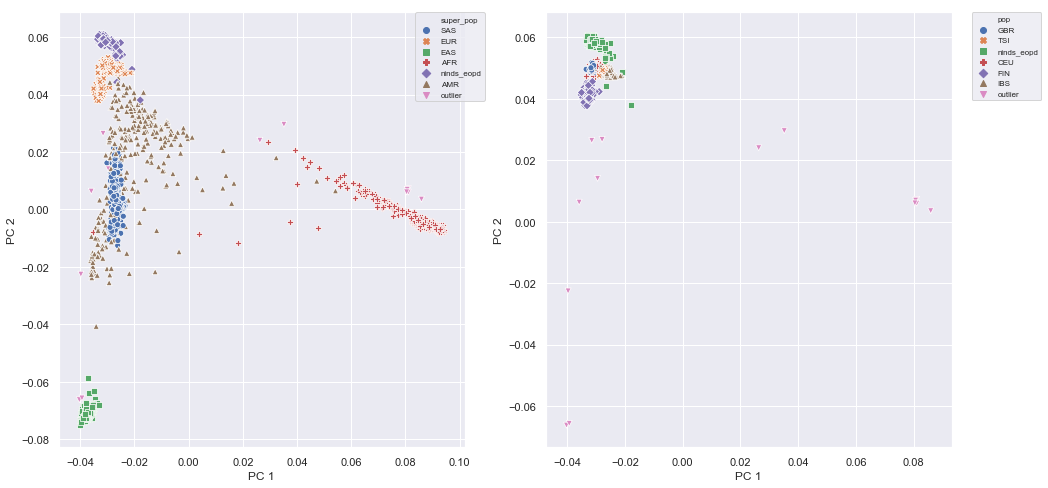

In [5]:
qc_dir =  f'{WRKDIR}/qc'
mdsfile = f'{qc_dir}/{COHORTBUILD}.onekg.ibs_ibd.mds.mds'
popinfofile =  f'{qc_dir}/onekg.panel'
output_pca_plot = f'{qc_dir}/{COHORTBUILD}.pop_structure.pca.png'
outfile = f'{qc_dir}/{COHORTBUILD}.pop.outliers.txt'

cohort_label = COHORT

expected_ancestry = 'EUR'

mdsdf = pd.read_csv(mdsfile,sep='\s+')
infodf = pd.read_csv(popinfofile,sep="\t")

df = mdsdf.merge(infodf,how='left',left_on='IID',right_on='sample')

df[['super_pop']] = df[['super_pop']].fillna(cohort_label)
df[['pop']] = df[['pop']].fillna(cohort_label)

ancestry_cohort = df.loc[df['super_pop'] == expected_ancestry]
coi = df.loc[df['super_pop'] == cohort_label]

mds1_mean = np.mean(ancestry_cohort['C1'])
mds1_std = np.std(ancestry_cohort['C1'])
mds2_mean = np.mean(ancestry_cohort['C2'])
mds2_std = np.std(ancestry_cohort['C2'])

maxSD = 6
plusMax_1 = mds1_mean + maxSD * mds1_std
negMax_1 = mds1_mean - maxSD * mds1_std
plusMax_2 = mds2_mean + maxSD * mds2_std
negMax_2 = mds2_mean - maxSD * mds2_std

df['outlier'] = ((df['super_pop'] == cohort_label) & \
    ((df['C1'] > plusMax_1) | (df['C1'] < negMax_1) | \
     (df['C2'] > plusMax_2) | (df['C2'] < negMax_2)))

outliers = df.loc[df['outlier'] == True] 
outliers.to_csv(outfile,sep="\t",index=False,header=False)

df.loc[df['IID'].isin(outliers['IID']),['super_pop','pop']] = 'outlier'

# df = df.sort_values('super_pop',ascending=False)
df = df.sample(frac=1)

cohort_euro_df = df[df['super_pop'].isin([expected_ancestry,cohort_label,'outlier'])]
# cohort_euro_df = cohort_euro_df.sort_values('pop',ascending=False)
# cohort_euro_df = cohort_euro_df.sample(frac=1)

sns.set()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='C1',y='C2',hue='super_pop',style='super_pop',data=df)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0,prop={'size': 8})
plt.subplot(1,2,2)
sns.scatterplot(x='C1',y='C2',hue='pop',style='pop',data=cohort_euro_df)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,prop={'size': 8})
#plt.legend(loc='upper right', prop={'size': 6})
plt.savefig(output_pca_plot,format='png',dpi=600,bbox_inches='tight')
plt.show()

In [14]:
df.head()

,FID,IID,SOL,C1,C2,C3,C4,C5,C6,C7,...,C18,C19,C20,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5,outlier
1103,HG03006,HG03006,0,-0.027618,-0.003371,-0.042326,0.000146,-0.003339,-0.000676,-0.001992,...,0.002522,-0.002765,0.001628,HG03006,BEB,SAS,male,NaN,NaN,False
228,HG00554,HG00554,0,-0.020207,0.035616,0.011807,-0.010436,0.006435,-0.010515,0.005433,...,-0.002620,0.005227,0.000217,HG00554,PUR,AMR,female,NaN,NaN,False
772,HG02108,HG02108,0,0.071980,0.003463,0.002197,0.001835,0.003102,0.000363,-0.001075,...,-0.002729,0.003856,-0.001751,HG02108,ACB,AFR,female,NaN,NaN,False
2305,NA20773,NA20773,0,-0.028516,0.048589,0.008230,0.004066,0.016358,-0.013131,0.006213,...,0.006151,0.001674,-0.003463,NA20773,TSI,EUR,female,NaN,NaN,False
1456,HG03873,HG03873,0,-0.025578,0.000916,-0.052141,-0.000555,-0.004510,0.000230,0.001602,...,-0.004072,0.008166,-0.033637,HG03873,ITU,SAS,female,NaN,NaN,False


In [6]:
cohort_euro_df['pop'].value_counts()

ninds_eopd    134
IBS           107
TSI           104
CEU            99
FIN            98
GBR            91
outlier        14
Name: pop, dtype: int64

In [7]:
mdsdf.set_index(mdsdf['IID'],inplace=True)
mdsdf.drop(columns=['FID','IID','SOL'],inplace=True)
mdsdf.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
IID,,,,,,,,,,,,,,,,,,,,
HG00096,-0.030845,0.049992,0.012833,0.002817,0.016931,0.004442,-0.002452,0.001082,-0.002418,0.001343,0.013804,-0.000051,0.004282,-0.004168,0.004888,-0.000797,0.000760,-0.002776,0.002404,-0.004128
HG00097,-0.031069,0.050532,0.012014,0.002583,0.016502,0.004576,-0.001263,-0.000129,-0.001587,0.001567,0.014040,-0.001939,0.005259,-0.001514,0.002454,0.001240,-0.004628,-0.000926,-0.001755,0.004181
HG00099,-0.031364,0.049827,0.011983,0.001757,0.015378,0.006195,-0.003835,-0.000783,-0.002504,-0.001713,0.016889,-0.001331,0.003329,-0.003763,0.002862,0.001451,0.001592,0.000417,0.004923,-0.002978
HG00100,-0.028523,0.050998,0.012454,0.002891,0.015711,0.001860,-0.001237,-0.000381,0.000153,-0.000034,0.018384,0.004070,0.000820,0.001165,0.007829,-0.003658,0.001454,0.001895,-0.000282,-0.000993
HG00101,-0.029837,0.049376,0.013342,0.001966,0.016678,0.005087,-0.002530,-0.000022,-0.001257,-0.000142,0.019363,0.001664,0.005348,-0.003400,0.000705,-0.002169,0.000755,-0.002595,0.003362,-0.002126


In [8]:
#run UMAP on the expression data
from umap import UMAP

umap_results = UMAP(random_state=42).fit_transform(mdsdf)
df_umap = pd.DataFrame(umap_results,columns=['x-umap','y-umap'], \
                                   index=mdsdf.index).round(3)
print(f'The dimensions of the umap df of the population ancestry data are {df_umap.shape}')
df_umap.head()

/Users/mooreank/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


The dimensions of the umap df of the population ancestry data are (2595, 2)


,x-umap,y-umap
IID,,
HG00096,-11.138,-12.234
HG00097,-10.531,-12.238
HG00099,-11.072,-12.263
HG00100,-10.063,-12.141
HG00101,-11.126,-12.372


In [9]:
df_umap = df_umap.merge(infodf,how='left',left_index=True,right_on='sample')

df_umap[['super_pop']] = df_umap[['super_pop']].fillna(cohort_label)
df_umap[['pop']] = df_umap[['pop']].fillna(cohort_label)

df_umap.loc[df_umap['sample'].isin(outliers['IID']),['super_pop','pop']] = 'outlier'

print(df_umap['super_pop'].value_counts())

cohort_euro_df = df_umap[df_umap['super_pop'].isin([expected_ancestry,cohort_label,'outlier'])]
print(cohort_euro_df['pop'].value_counts())

# cohort_euro_df = cohort_euro_df.sort_values('sample',ascending=False)
cohort_euro_df = cohort_euro_df.sample(frac=1)

AFR           657
EUR           499
EAS           499
SAS           481
AMR           311
ninds_eopd    134
outlier        14
Name: super_pop, dtype: int64
ninds_eopd    134
IBS           107
TSI           104
CEU            99
FIN            98
GBR            91
outlier        14
Name: pop, dtype: int64


In [10]:
df_umap.head()

,x-umap,y-umap,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,-11.138,-12.234,HG00096,GBR,EUR,male,NaN,NaN
1,-10.531,-12.238,HG00097,GBR,EUR,female,NaN,NaN
2,-11.072,-12.263,HG00099,GBR,EUR,female,NaN,NaN
3,-10.063,-12.141,HG00100,GBR,EUR,female,NaN,NaN
4,-11.126,-12.372,HG00101,GBR,EUR,male,NaN,NaN


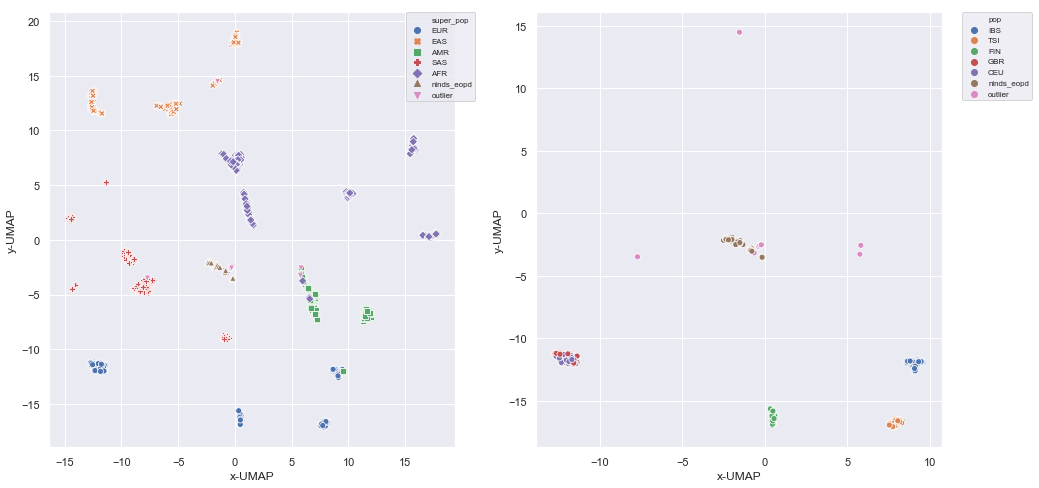

In [24]:
output_umap_plot = f'{qc_dir}/{COHORTBUILD}.pop_structure.umap.png'

sns.set()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x-umap',y='y-umap',hue='super_pop',style='super_pop',data=df_umap)
plt.xlabel('x-UMAP')
plt.ylabel('y-UMAP')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0,prop={'size': 8})
plt.subplot(1,2,2)
sns.scatterplot(x='x-umap',y='y-umap',hue='pop',data=cohort_euro_df)
plt.xlabel('x-UMAP')
plt.ylabel('y-UMAP')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,prop={'size': 8})
plt.savefig(output_umap_plot,format='png',dpi=600,bbox_inches='tight')
plt.show()

#### accumulate definite excludes, ie sample QC fails
missingness, sexcheck, het-rate, and contamination

In [40]:
#sex check mismatches
sexcheck_file = f'{WRKDIR}/qc/{COHORTBUILD}.sex.sexcheck'
sexcheck_df = pd.read_csv(sexcheck_file,sep='\s+')
sexcheck_problems_df = sexcheck_df[(sexcheck_df['STATUS'] == 'PROBLEM') & (sexcheck_df['PEDSEX'] != 0)]
print('sex mismatches')
print(f'{sexcheck_problems_df.shape[0]} failed sexcheck')

#check missingness 
smiss_file = f'{WRKDIR}/qc/{COHORTBUILD}.missing.lmiss'
smiss_df = pd.read_csv(smiss_file,sep='\s+')
smiss_problems_df = smiss_df[smiss_df['F_MISS'] > 0.05]
print(f'{smiss_problems_df.shape[0]} failed missingness check')

#het rate problems
hetcheck_file = f'{WRKDIR}/qc/{COHORTBUILD}.het.het'
hetcheck_df = pd.read_csv(hetcheck_file,sep='\s+')
hetcheck_problems_df = hetcheck_df[(hetcheck_df['F'] > 0.15) | (hetcheck_df['F'] < -0.15)]
print(f'{hetcheck_problems_df.shape[0]} failed het rate check')

#sample contamination problems
# contam_df = pd.DataFrame(data=None,columns=['id'])
contam_file = f'{WRKDIR}/{COHORTBUILD}.contaminated.samples.txt'
contam_df = pd.read_csv(contam_file,sep='\s+')
print(f'{contam_df.shape[0]} failed contamination check')


sex mismatches
0 failed sexcheck
0 failed missingness check
2 failed het rate check
0 failed contamination check


In [46]:
# def_exclude_set = set(sexcheck_problems_df['IID']) | set(smiss_problems_df['IID']) | \
# set(hetcheck_problems_df['IID']) | set(contam_df['id']) 

one=set(sexcheck_problems_df['IID'])
two=set(smiss_problems_df['SNP'])
three=set(hetcheck_problems_df['IID'])
four=set(contam_df['id'])

def_exclude_set = one | two | three | four



print(f'{len(def_exclude_set)} samples should be excluded to exclude')

2 samples should be excluded to exclude


In [45]:
smiss_problems_df.head()

,CHR,SNP,N_MISS,N_GENO,F_MISS


In [47]:
def_exclude_set

{'PennEOPD081', 'PennEOPD136'}